In [1]:
import struct
import numpy as np
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

In [2]:
x_train = read_idx('F:/study/masters/3 sem/OR-610/Assignment-2/train-images.idx3-ubyte')
y_train = read_idx('F:/study/masters/3 sem/OR-610/Assignment-2/train-labels.idx1-ubyte').reshape(-1,1)
x_test = read_idx('F:/study/masters/3 sem/OR-610/Assignment-2/test10k-images.idx3-ubyte')
y_test = read_idx('F:/study/masters/3 sem/OR-610/Assignment-2/test10k-labels.idx1-ubyte').reshape(-1,1) 

C:\Users\Chava Sujan\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


In [3]:
  
x_train[0:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [4]:
y_train[0:2]

array([[5],
       [0]], dtype=uint8)

In [5]:
x_test[0:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [6]:
y_test[0:2]

array([[7],
       [2]], dtype=uint8)

One Layer Neural network model

In [7]:
np.shape(x_train)

(60000, 28, 28)

In [8]:
np.shape(y_train)

(60000, 1)

In [9]:
np.shape(x_test)

(10000, 28, 28)

In [10]:
np.shape(y_test)

(10000, 1)

In [11]:
#joining x and y 
x = np.vstack((x_train,x_test))
y = np.vstack((y_train,y_test))
print (x.shape,y.shape)

(70000, 28, 28) (70000, 1)


In [12]:
#one-hott encoding
digits = 10
total = y.shape[0]
y = y.reshape(total,1)
y = np.eye(digits)[y.astype('int32')]
y = y.reshape(total,digits)

In [13]:
#splitting again into train and test sets
total_train = 60000
total_test = x.shape[0] - total_train
x_train, x_test = x[:total_train], x[total_train:]
y_train, y_test = y[:total_train], y[total_train:]
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
print (x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


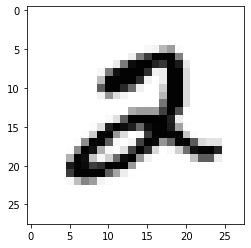

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[5].reshape(28,28), cmap='Greys', interpolation='None')

NEURAL NETWORK

In [15]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def sigmoid_derv(s):
    return s * (1 - s)

def softmax(s):
    exps = np.exp(s - np.max(s, axis=1, keepdims=True))
    return exps/np.sum(exps, axis=1, keepdims=True)

def cross_entropy(pred, real):
    n_samples = real.shape[0]
    res = pred - real
    return res/n_samples

def error(pred, real):
    n_samples = real.shape[0]
    logp = - np.log(pred[np.arange(n_samples), real.argmax(axis=1)])
    loss = np.sum(logp)/n_samples
    return loss

class neuralNetwork:
    def __init__(self, x, y,hnode,learningrate):
        self.x = x
        hidden = hnode
        self.lr = learningrate
        ip_dim = x.shape[1]
        op_dim = y.shape[1]

        self.w1 = np.random.randn(ip_dim, hidden)
        self.b1 = np.zeros((1, hidden))
        self.w2 = np.random.randn(hidden, hidden)
        self.b2 = np.zeros((1, hidden))
        self.w3 = np.random.randn(hidden, op_dim)
        self.b3 = np.zeros((1, op_dim))
        self.y = y

    def feedforward(self):
        z1 = np.dot(self.x, self.w1) + self.b1
        self.a1 = sigmoid(z1)
        z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = sigmoid(z2)
        z3 = np.dot(self.a2, self.w3) + self.b3
        self.a3 = softmax(z3)
        
    def backprop(self):
        loss = error(self.a3, self.y)
        print('Error :', loss)
        a3_delta = cross_entropy(self.a3, self.y) # w3
        z2_delta = np.dot(a3_delta, self.w3.T)
        a2_delta = z2_delta * sigmoid_derv(self.a2) # w2
        z1_delta = np.dot(a2_delta, self.w2.T)
        a1_delta = z1_delta * sigmoid_derv(self.a1) # w1

        self.w3 -= self.lr * np.dot(self.a2.T, a3_delta)
        self.b3 -= self.lr * np.sum(a3_delta, axis=0, keepdims=True)
        self.w2 -= self.lr * np.dot(self.a1.T, a2_delta)
        self.b2 -= self.lr * np.sum(a2_delta, axis=0)
        self.w1 -= self.lr * np.dot(self.x.T, a1_delta)
        self.b1 -= self.lr * np.sum(a1_delta, axis=0)

    def predict(self, data):
        self.x = data
        self.feedforward()
        return self.a3.argmax()

Training the model and train time

In [16]:
import time
#10 hidden nodes and 0.1 learning rate
model = neuralNetwork(x_train,y_train,10,0.1)
epochs = 15
start = time.time()
for i in range(epochs):
    model.feedforward()
    model.backprop()
end = time.time()
print("Train time in sec:",end-start)

Error : 2.9537837337273096
Error : 2.874457463798652
Error : 2.809870700137839
Error : 2.757227858932656
Error : 2.71397826869885
Error : 2.677100335621784
Error : 2.64487496900563
Error : 2.617152281295585
Error : 2.5927641080575174
Error : 2.571327440532124
Error : 2.552244190467845
Error : 2.5352270568552564
Error : 2.5199888242013553
Error : 2.50643451158851
Error : 2.493924205847938
Train time in sec: 12.95383882522583


In [17]:
def accuracy(x,y):
    ac = 0
    for m,n in zip(x,y):
        pred = model.predict(m)
        if pred == np.argmax(n):
            ac += 1
    return (ac/len(x))*100
acc = accuracy(x_test,y_test)
print("Testing accuracy is:",acc)

Testing accuracy is: 13.54


PREDICTIONS

In [18]:
predictions = []
for i in x_test:
    predictions.append(model.predict(i))
predictions

[6,
 2,
 0,
 4,
 7,
 0,
 0,
 0,
 9,
 9,
 0,
 6,
 0,
 0,
 2,
 0,
 7,
 7,
 0,
 0,
 9,
 0,
 5,
 0,
 0,
 0,
 7,
 0,
 3,
 6,
 5,
 6,
 2,
 7,
 7,
 7,
 5,
 2,
 5,
 0,
 2,
 7,
 4,
 6,
 7,
 0,
 5,
 9,
 0,
 7,
 0,
 0,
 4,
 2,
 3,
 6,
 0,
 0,
 4,
 0,
 8,
 6,
 0,
 0,
 7,
 6,
 0,
 7,
 7,
 0,
 7,
 0,
 0,
 7,
 2,
 7,
 8,
 7,
 2,
 7,
 7,
 0,
 7,
 7,
 6,
 0,
 0,
 7,
 7,
 0,
 7,
 7,
 0,
 7,
 2,
 0,
 6,
 6,
 0,
 8,
 7,
 0,
 4,
 0,
 0,
 0,
 7,
 2,
 7,
 9,
 6,
 2,
 2,
 7,
 2,
 6,
 7,
 0,
 9,
 0,
 0,
 2,
 5,
 2,
 7,
 5,
 2,
 0,
 6,
 0,
 7,
 7,
 0,
 7,
 6,
 0,
 9,
 0,
 7,
 6,
 5,
 0,
 0,
 0,
 6,
 3,
 0,
 6,
 6,
 6,
 0,
 0,
 8,
 6,
 5,
 0,
 8,
 9,
 6,
 8,
 7,
 6,
 0,
 7,
 0,
 0,
 6,
 0,
 0,
 0,
 7,
 0,
 3,
 3,
 0,
 0,
 7,
 6,
 0,
 0,
 0,
 7,
 7,
 0,
 7,
 7,
 5,
 0,
 3,
 6,
 0,
 6,
 0,
 8,
 3,
 6,
 2,
 6,
 7,
 7,
 7,
 7,
 2,
 0,
 0,
 4,
 7,
 0,
 2,
 8,
 0,
 0,
 8,
 2,
 0,
 0,
 0,
 3,
 7,
 4,
 7,
 9,
 0,
 0,
 0,
 0,
 7,
 7,
 0,
 2,
 7,
 9,
 7,
 0,
 2,
 4,
 7,
 2,
 7,
 0,
 0,
 0,
 9,
 8,
 5,
 7,
 3,
 7,
 0,
 2,


In [ ]:
 2,
 3,
 0,
 8,
 4,
 5,
 3,
 3,
 3,
 0,
 3,
 7,
 1,
 3,
 0,
 4,
 2,
 7,
 4,
 4,
 4,
 5,
 9,
 9,
 3,
 2,
 9,
 3,
 9,
 4,
 1,
 0,
 6,
 1,
 2,
 7,
 3,
 1,
 4,
 3,
 1,
 9,
 0,
 6,
 4,
 4,
 1,
 1,
 4,
 0,
 0,
 7,
 2,
 4,
 8,
 4,
 7,
 3,
 7,
 1,
 2,
 1,
 0,
 1,
 0,
 0,
 7,
 7,
 8,
 3,
 2,
 3,
 3,
 4,
 4,
 5,
 9,
 8,
 9,
 7,
 8,
 2,
 0,
 3,
 8,
 2,
 1,
 4,
 2,
 4,
 2,
 7,
 9,
 3,
 1,
 0,
 2,
 5,
 9,
 7,
 5,
 4,
 0,
 0,
 8,
 7,
 2,
 7,
 1,
 3,
 7,
 7,
 9,
 6,
 3,
 9,
 6,
 9,
 3,
 9,
 7,
 0,
 9,
 2,
 3,
 4,
 9,
 5,
 9,
 6,
 3,
 3,
 4,
 3,
 3,
 7,
 7,
 5,
 3,
 3,
 3,
 9,
 3,
 0,
 9,
 9,
 4,
 0,
 3,
 0,
 4,
 9,
 7,
 9,
 1,
 9,
 4,
 4,
 8,
 6,
 9,
 8,
 8,
 3,
 4,
 0,
 3,
 4,
 0,
 7,
 3,
 3,
 1,
 5,
 0,
 9,
 9,
 0,
 1,
 9,
 7,
 0,
 7,
 2,
 3,
 4,
 4,
 7,
 9,
 2,
 0,
 7,
 1,
 7,
 3,
 1,
 8,
 1,
 3,
 0,
 0,
 0,
 9,
 1,
 1,
 3,
 3,
 4,
 7,
 1,
 2,
 0,
 5,
 8,
 3,
 4,
 4,
 9,
 2,
 9,
 1,
 8,
 4,
 4,
 1,
 4,
 2,
 9,
 7,
 1,
 4,
 3,
 1,
 7,
 3,
 7,
 3,
 6,
 4,
 6,
 3,
 7,
 4,
 3,
 8,
 4,
 5,
 0,
 7,
 0,
 6,
 0,
 1,
 1,
 6,
 4,
 7,
 8,
 0,
 7,
 3,
 0,
 5,
 4,
 9,
 9,
 3,
 5,
 5,
 6,
 3,
 0,
 0,
 1,
 1,
 1,
 4,
 8,
 0,
 7,
 3,
 4,
 1,
 7,
 3,
 9,
 8,
 0,
 2,
 6,
 7,
 2,
 1,
 4,
 1,
 2,
 5,
 4,
 1,
 0,
 7,
 0,
 1,
 4,
 3,
 8,
 1,
 0,
 8,
 4,
 3,
 1,
 1,
 2,
 4,
 9,
 7,
 7,
 8,
 4,
 3,
 7,
 4,
 5,
 1,
 1,
 3,
 4,
 7,
 1,
 9,
 9,
 2,
 9,
 1,
 9,
 0,
 3,
 3,
 3,
 1,
 7,
 5,
 7,
 4,
 7,
 7,
 1,
 9,
 3,
 2,
 0,
 7,
 2,
 5,
 1,
 3,
 3,
 3,
 4,
 8,
 3,
 5,
 2,
 3,
 3,
 1,
 2,
 3,
 8,
 6,
 8,
 3,
 0,
 3,
 8,
 3,
 0,
 2,
 3,
 8,
 1,
 7,
 1,
 4,
 0,
 4,
 7,
 1,
 9,
 4,
 7,
 1,
 1,
 0,
 4,
 0,
 1,
 7,
 3,
 9,
 7,
 0,
 2,
 3,
 1,
 3,
 1,
 0,
 7,
 8,
 8,
 3,
 5,
 8,
 2,
 4,
 4,
 6,
 7,
 6,
 8,
 7,
 6,
 3,
 2,
 5,
 7,
 0,
 7,
 2,
 6,
 2,
 6,
 2,
 7,
 0,
 1,
 4,
 8,
 7,
 2,
 7,
 4,
 3,
 2,
 1,
 3,
 0,
 7,
 4,
 3,
 0,
 5,
 8,
 2,
 0,
 1,
 4,
 4,
 4,
 1,
 1,
 4,
 1,
 4,
 7,
 4,
 3,
 3,
 7,
 8,
 0,
 4,
 7,
 1,
 1,
 1,
 2,
 2,
 3,
 9,
 3,
 6,
 3,
 4,
 1,
 1,
 4,
 0,
 8,
 9,
 4,
 9,
 9,
 3,
 0,
 4,
 7,
 4,
 1,
 3,
 3,
 3,
 4,
 1,
 1,
 7,
 9,
 6,
 9,
 9,
 9,
 7,
 5,
 3,
 7,
 1,
 1,
 4,
 1,
 1,
 0,
 6,
 1,
 9,
 9,
 9,
 4,
 5,
 1,
 3,
 3,
 3,
 1,
 5,
 1,
 0,
 2,
 3,
 8,
 1,
 0,
 6,
 9,
 1,
 7,
 2,
 0,
 7,
 0,
 3,
 0,
 2,
 0,
 6,
 7,
 ...]
# Using different hidden nodes and learning rate
hidden = [50,60]
learn_rate = [0.5,1]
for i in hidden:
    for j in learn_rate:
        model = neuralNetwork(x_train,y_train,i,j)
        epochs = 1500
        start = time.time()
        for m in range(epochs):
            model.feedforward()
            model.backprop()
        end = time.time()
        print("Train time in sec for hidden: ",i,"and lr: ",j,"is: ",end-start)
        temp = accuracy(x_test,y_test)
        if(temp > acc):
            acc = temp
            best_hidden = i
            best_lr = j
print("Best Accuracy:",acc)
print("Best HiddenNodes:",best_hidden)
print("Best learningrate:",best_lr)
Error : 6.601033110126374
Error : 3.9643904300408894
Error : 3.29030205167433
Error : 3.038004951069897
Error : 2.9195810292574302
Error : 2.833347941957387
Error : 2.7595608406653005
Error : 2.6925399338128706
Error : 2.62979152185172
Error : 2.5653419195675746
Error : 2.509113883206923
Error : 2.453656555502475
Error : 2.398465798579623
Error : 2.3502269922611396
Error : 2.308480067013852
Error : 2.265547414504611
Error : 2.22349795282324
Error : 2.185269086931252
Error : 2.150016877268308
Error : 2.1154923258192957
Error : 2.0838342932616167
Error : 2.05252209023937
Error : 2.0220962457868135
Error : 1.9962837222058691
Error : 1.971402428209871
Error : 1.9468874017646174
Error : 1.9232722659533985
Error : 1.9014535847049678
Error : 1.8810568318177276
Error : 1.861374110871357
Error : 1.8422411871935707
Error : 1.8223175735226331
Error : 1.8043303523133456
Error : 1.7851520809341683
Error : 1.768271654326752
Error : 1.7508376114394846
Error : 1.7325317252137922
Error : 1.7178134498938749
Error : 1.701106370939728
Error : 1.6848773118528921
Error : 1.67003721080454
Error : 1.6569048265195296
Error : 1.6428818980832818
Error : 1.63045140364748
Error : 1.6170092681069623
Error : 1.6056810646082271
Error : 1.593974815572683
Error : 1.582314179687826
Error : 1.570629845071638
Error : 1.5613516428526042
Error : 1.549892092096282
Error : 1.5386332679967814
Error : 1.528138083536574
Error : 1.5160413520100466
Error : 1.5064087558109445
Error : 1.496472205129953
Error : 1.4865602425395614
Error : 1.476551534619996
Error : 1.4681168667144038
Error : 1.4582479032951652
Error : 1.4490485535101285
Error : 1.4415626791799792
Error : 1.4322694452374631
Error : 1.4235514284735893
Error : 1.4148528516586498
Error : 1.4064331375316264
Error : 1.3991195440158197
Error : 1.3909251646704024
Error : 1.3840911121644393
Error : 1.3762603717191801
Error : 1.3703379791697
Error : 1.3654093705886197
Error : 1.3576839218066532
Error : 1.3505191760417123
Error : 1.345861822268856
Error : 1.338702715258499
Error : 1.3323128197554897
Error : 1.326842445284918
Error : 1.3202518338877116
Error : 1.3137942004434908
Error : 1.30701722627857
Error : 1.302192754123187
Error : 1.2957799033375828
Error : 1.2902328908897105
Error : 1.2841912817422778
Error : 1.2786694479636742
Error : 1.2741420535986094
Error : 1.2676549946803835
Error : 1.2620729538242177
Error : 1.2565424297096255
Error : 1.2520725273040227
Error : 1.2480726148218222
Error : 1.2427534934751923
Error : 1.238108812742184
Error : 1.2336815488877197
Error : 1.2288867577611862
Error : 1.2247852751874035
Error : 1.2193757775631915
Error : 1.214626704428287
Error : 1.2105242501948053
Error : 1.2060051358082724
Error : 1.2020720330308714
Error : 1.1965342214782941
Error : 1.1929301925694966
Error : 1.1887442772655634
Error : 1.1835558027365805
Error : 1.1790234566647735
Error : 1.1755182038355012
Error : 1.1721817093827618
Error : 1.166930797455609
Error : 1.1639086829115362
Error : 1.16066054118557
Error : 1.1563867834642743
Error : 1.1528693258161715
Error : 1.149090867388213
Error : 1.146249105046398
Error : 1.1416719235477422
Error : 1.1387025109081919
Error : 1.135444006110981
Error : 1.1322359975751752
Error : 1.129349271505102
Error : 1.126313735565252
Error : 1.12211929157566
Error : 1.1191693257196444
Error : 1.1149434617861127
Error : 1.1124915245730873
Error : 1.1091349550396903
Error : 1.1072749695267057
Error : 1.1031710172969078
Error : 1.1008019865164649
Error : 1.0972137453857669
Error : 1.0944963835966053
Error : 1.0921144557044788
Error : 1.0888846680750004
Error : 1.0866357595551395
Error : 1.0833678800910154
Error : 1.0807747816903341
Error : 1.0784286638345058
Error : 1.0751885867159554
Error : 1.072658221935518
Error : 1.0699365723523802
Error : 1.0666280017414804
Error : 1.064148976204444
Error : 1.0621615240462496
Error : 1.0602184122825813
Error : 1.0574120276142356
Error : 1.0556363712550927
Error : 1.0528760505462529
Error : 1.0496726096562792
Error : 1.0479446379032356
Error : 1.044882406905869
Error : 1.0437401195033005
Error : 1.0405000311300543
Error : 1.039173629568806
Error : 1.035994557910291
Error : 1.033154864476057
Error : 1.0306808920243529
Error : 1.0301952341605745
Error : 1.028037793650357
Error : 1.0256330904363584
Error : 1.0232192749194826
Error : 1.0201573052362491
Error : 1.0188632086343834
Error : 1.0159141073124307
Error : 1.0146071365168674
Error : 1.0115589374820744
Error : 1.0114170668216558
Error : 1.0090056237701703
Error : 1.0056728655508083
Error : 1.0036908525859882
Error : 1.001951121214769
Error : 0.9995934456408465
Error : 0.9984514139411782
Error : 0.9967116175968563
Error : 0.99430265731873
Error : 0.9924069627476502
Error : 0.9908459733611091
Error : 0.9884514328582452
Error : 0.9873476170753561
Error : 0.9844240608531565
Error : 0.9826446641427365
Error : 0.9807485539573966
Error : 0.9787205788314589
Error : 0.9776958222272677
Error : 0.9748636973831745
Error : 0.9737208920920144
Error : 0.9723356213444752
Error : 0.9699804553038196
Error : 0.9677343999605451
Error : 0.9662882610925894
Error : 0.9643993781166269
Error : 0.9626347028331614
Error : 0.9603474142699723
Error : 0.9582610911006821
Error : 0.9566125164392311
Error : 0.9550975059452584
Error : 0.9536811146786195
Error : 0.953649436981141
Error : 0.9511606731807803
Error : 0.951592046027736
Error : 0.9503413571409942
Error : 0.9471982857636889
Error : 0.9453596841263786
Error : 0.942745675531161
Error : 0.9420712516709754
Error : 0.9408729159846126
Error : 0.9382461902192998
Error : 0.9366094490136203
Error : 0.9358015658486656
Error : 0.9359384562034903
Error : 0.934626056241328
Error : 0.9324010612150896
Error : 0.9319465091475914
Error : 0.9301604207625126
Error : 0.9289242521081406
Error : 0.9260640771779308
Error : 0.9259116357563536
Error : 0.9253035899114522
Error : 0.9233474036021796
Error : 0.9219127595334651
Error : 0.9204550318952182
Error : 0.9183259156122469
Error : 0.917086753787176
Error : 0.9140501292101418
Error : 0.914087285542454
Error : 0.9118849941482571
Error : 0.9116896838932531
Error : 0.9102298654338543
Error : 0.9086648163413257
Error : 0.9069737092345241
Error : 0.9055997237196703
Error : 0.90502064997154
Error : 0.9031496527527044
Error : 0.9009658486311025
Error : 0.9001786486547949
Error : 0.8988472593530314
Error : 0.8985061748711962
Error : 0.8968940450265387
Error : 0.8953151216410956
Error : 0.8933937563989864
Error : 0.8921779618650363
Error : 0.8906421858179602
Error : 0.889818081076587
Error : 0.8897285723103615
Error : 0.8869613209577668
Error : 0.8862329261781858
Error : 0.8867605995569313
Error : 0.8830887392609462
Error : 0.8821627317620273
Error : 0.8817960653904617
Error : 0.879730593791027
Error : 0.8816426957344337
Error : 0.8805684884944807
Error : 0.8776629955330374
Error : 0.8761751396231383
Error : 0.874807009916929
Error : 0.8735845398158343
Error : 0.8733420344903607
Error : 0.8724989374663548
Error : 0.8710162989494149
Error : 0.8702440058334928
Error : 0.8686942217059731
Error : 0.8680261749548509
Error : 0.8681097228841448
Error : 0.8671214136040742
Error : 0.8642176090585331
Error : 0.8629924203681572
Error : 0.8617433378515681
Error : 0.8622106023585939
Error : 0.8601355556578163
Error : 0.8592379640736267
Error : 0.858094920498562
Error : 0.8577553134563178
Error : 0.8571236471279
Error : 0.8562719851570414
Error : 0.8542574359076133
Error : 0.8523801852662699
Error : 0.8529368541878781
Error : 0.8505908787091029
Error : 0.8505546012517268
Error : 0.849242199525649
Error : 0.8492023842656051
Error : 0.848393951009479
Error : 0.8462846901352061
Error : 0.8463025220192616
Error : 0.8457361186608462
Error : 0.8444867235223136
Error : 0.8439805619635001
Error : 0.8423115813484344
Error : 0.8424836705246667
Error : 0.841243259899047
Error : 0.8406223243508268
Error : 0.8402028825502883
Error : 0.8387191965666791
Error : 0.8384495249124378
Error : 0.8365858000882503
Error : 0.8364557854551438
Error : 0.8350464122908214
Error : 0.8352405168973205
Error : 0.8355430251084123
Error : 0.8335882783478291
Error : 0.8320088341864095
Error : 0.8305808432683313
Error : 0.8297410032161048
Error : 0.8285224729833571
Error : 0.8287378796461493
Error : 0.8267238064980501
Error : 0.8262633030521256
Error : 0.8250691674252072
Error : 0.8236657337524741
Error : 0.8243424298038936
Error : 0.8236709962503892
Error : 0.823008908193839
Error : 0.8223645823781219
Error : 0.8200072077586092
Error : 0.8198720695357944
Error : 0.8204461699704007
Error : 0.8191577262734868
Error : 0.818711963143318
Error : 0.8170874103450758
Error : 0.8176219948454934
Error : 0.8178503326682401
Error : 0.8163136149818303
Error : 0.8170700675018384
Error : 0.81359502809284
Error : 0.8129369172709812
Error : 0.8129473825740636
Error : 0.8112219568933838
Error : 0.8102226859524566
Error : 0.8113719294802556
Error : 0.8093025551173076
Error : 0.8088685645698984
Error : 0.8077448185107957
Error : 0.8070114748530649
Error : 0.8066440811851356
Error : 0.8057600403750927
Error : 0.8051425655052824
Error : 0.8042121850380225
Error : 0.8033781135677401
Error : 0.8026185227217421
Error : 0.8037593350992408
Error : 0.8023451928909485
Error : 0.8020774681121555
Error : 0.8003254578620608
Error : 0.7996941847723968
Error : 0.7996008948217199
Error : 0.7999018181672436
Error : 0.7995418800062506
Error : 0.7966562425047098
Error : 0.7970784791275556
Error : 0.7970424084740637
Error : 0.7964772944818266
Error : 0.79524118600449
Error : 0.794706163448641
Error : 0.7947556703460835
Error : 0.7919574220191716
Error : 0.7923055055225048
Error : 0.7901094924576568
Error : 0.789887777682278
Error : 0.7894545770811626
Error : 0.7884461353154469
Error : 0.7892755119273542
Error : 0.7905713050582205
Error : 0.7882904457006333
Error : 0.7899895563787576
Error : 0.7874628350865548
Error : 0.7862017943674924
Error : 0.78510668273645
Error : 0.78517040016806
Error : 0.7861413769580119
Error : 0.7842501283527071
Error : 0.7829539060987333
Error : 0.7820834257295277
Error : 0.7812144486973795
Error : 0.7815117988433963
Error : 0.7810571864485069
Error : 0.7804145842173144
Error : 0.779930255489081
Error : 0.779013087927528
Error : 0.7794037774309701
Error : 0.7786526481614281
Error : 0.7786783429268564
Error : 0.7763333632507395
Error : 0.7756407253920312
Error : 0.7751499743905454
Error : 0.7753580790982352
Error : 0.7740386659297802
Error : 0.7738091663313662
Error : 0.7730999433762339
Error : 0.7727744102913396
Error : 0.7726646507393211
Error : 0.7730249339647093
Error : 0.7706755716054533
Error : 0.7713218028497016
Error : 0.769951144241967
Error : 0.7696047805637536
Error : 0.770594400933728
Error : 0.7689487043140115
Error : 0.768823861005362
Error : 0.7675762891222476
Error : 0.7678504999073726
Error : 0.7676086614499181
Error : 0.7673577969875941
Error : 0.7650149552277087
Error : 0.7656480936311076
Error : 0.7649968316982363
Error : 0.7638506786915374
Error : 0.7633763437204724
Error : 0.7630647894261936
Error : 0.7628968820111383
Error : 0.7631558435505077
Error : 0.7622578677882841
Error : 0.7615320917556277
Error : 0.7610997628862674
Error : 0.7605717206113632
Error : 0.7603576553502186
Error : 0.7593707237460111
Error : 0.7588650797958829
Error : 0.7600090311362692
Error : 0.7580489999794804
Error : 0.7565564163972934
Error : 0.7569504538606043
Error : 0.756938986596039
Error : 0.7568982508419327
Error : 0.7568239615892958
Error : 0.7554566127607575
Error : 0.7545366697430324
Error : 0.753305316577192
Error : 0.7528943123336395
Error : 0.7537205506641739
Error : 0.7518774725865229
Error : 0.7519671174179097
Error : 0.7522472291868421
Error : 0.7516704581110364
Error : 0.7521014795810625
Error : 0.7502716564690678
Error : 0.749427003121102
Error : 0.7499356295000201
Error : 0.7491869726421563
Error : 0.7480489235533511
Error : 0.7481105379389139
Error : 0.7484465114109422
Error : 0.7493322970126449
Error : 0.7463269713688164
Error : 0.746065491593431
Error : 0.7452028896570198
Error : 0.7445417798057816
Error : 0.7454407055612051
Error : 0.7448677824055532
Error : 0.744248178309873
Error : 0.7428089804970189
Error : 0.7427617584481602
Error : 0.743587782194452
Error : 0.7411301508891183
Error : 0.7416334129403382
Error : 0.7407110425879934
Error : 0.7410186944962817
Error : 0.740950285547368
Error : 0.7405605198646166
Error : 0.7404360238194314
Error : 0.739746971227507
Error : 0.7380923670694999
Error : 0.7382343861103703
Error : 0.7382960964567032
Error : 0.7387333182792496
Error : 0.7373099704558687
Error : 0.7365748228075326
Error : 0.7350751556020013
Error : 0.7347261770786072
Error : 0.7348567233956814
Error : 0.7347091630276668
Error : 0.7354853054005478
Error : 0.7330011027092062
Error : 0.7339987241048742
Error : 0.7352325203163924
Error : 0.7319973832280527
Error : 0.7328233969277383
Error : 0.7321212484470502
Error : 0.7316899325497392
Error : 0.7313245076736332
Error : 0.7299348776340864
Error : 0.7300164309952226
Error : 0.7292501428474538
Error : 0.7287386698002498
Error : 0.727298989876883
Error : 0.7277047623794171
Error : 0.7272466316205207
Error : 0.7278939432366086
Error : 0.7271827015875602
Error : 0.728851641117634
Error : 0.7277942771756327
Error : 0.7255128677210194
Error : 0.724673266753444
Error : 0.7251798656733905
Error : 0.7250737624753048
Error : 0.7239925173949471
Error : 0.7239972564357284
Error : 0.7243664566430793
Error : 0.7218978055879484
Error : 0.722679287673686
Error : 0.7220293402366986
Error : 0.7218064331596826
Error : 0.721146654249123
Error : 0.720273783897275
Error : 0.7209942414906163
Error : 0.7221309385986843
Error : 0.7211885724488277
Error : 0.7210103767665048
Error : 0.7210698870658117
Error : 0.7202518566286674
Error : 0.7187710467595849
Error : 0.7187869446672269
Error : 0.7176331871963936
Error : 0.718235943895614
Error : 0.7173800140250477
Error : 0.7175431187001043
Error : 0.716885502155253
Error : 0.7154028078548886
Error : 0.7167054560301158
Error : 0.7164791195377679
Error : 0.7153486559334
Error : 0.7147357617826526
Error : 0.7132499579154231
Error : 0.7135851154506807
Error : 0.7158140502014186
Error : 0.7134605741249611
Error : 0.7130388748528824
Error : 0.7108645021899831
Error : 0.7119984293591306
Error : 0.713828728229864
Error : 0.7129491158737861
Error : 0.7107561376430701
Error : 0.7117340943086959
Error : 0.7104686906505611
Error : 0.7098128391312203
Error : 0.7097987379640247
Error : 0.7110029167408137
Error : 0.7119482136917215
Error : 0.7100548576951884
Error : 0.7086269321108273
Error : 0.7079586700641324
Error : 0.7080499327145044
Error : 0.7095280393722128
Error : 0.7083543131334732
Error : 0.7064503822366339
Error : 0.7067031611379746
Error : 0.708097267139922
Error : 0.7071285451754837
Error : 0.7058072857027091
Error : 0.706067373764794
Error : 0.705917089944754
Error : 0.7043682662220071
Error : 0.7037903468255883
Error : 0.7046215827647153
Error : 0.7029904794040646
Error : 0.7021218899732371
Error : 0.7022716095429915
Error : 0.7026850160941478
Error : 0.7050023169733135
Error : 0.7063421630762023
Error : 0.7024020398766133
Error : 0.7000585240754056
Error : 0.6992792946613363
Error : 0.7011778821481874
Error : 0.7012574900855352
Error : 0.6997612089800284
Error : 0.7004238813722721
Error : 0.6995603101465875
Error : 0.6991775277177753
Error : 0.6983121252081971
Error : 0.6999836970905635
Error : 0.6996192772438916
Error : 0.6975607384043452
Error : 0.6969538705644416
Error : 0.69664342665333
Error : 0.6964707719538399
Error : 0.697783771515364
Error : 0.6961404900391993
Error : 0.6971004094351219
Error : 0.697314536133647
Error : 0.6964046718790622
Error : 0.6975449333412046
Error : 0.6956241361770193
Error : 0.6944391379904239
Error : 0.6934678289767903
Error : 0.6955301741535284
Error : 0.6976223861716341
Error : 0.6943031914713834
Error : 0.6925499895298242
Error : 0.6939362723018517
Error : 0.695166486886066
Error : 0.6939781555137212
Error : 0.6931044967503465
Error : 0.6914269051498931
Error : 0.6911380996003802
Error : 0.6906072027989502
Error : 0.6900910325855505
Error : 0.6904578519784125
Error : 0.6906486901569285
Error : 0.6912893382230916
Error : 0.6901131945434902
Error : 0.6886594264071718
Error : 0.6900584398264545
Error : 0.688243449420999
Error : 0.688621953596193
Error : 0.6890327355434451
Error : 0.6887666718553077
Error : 0.6873194741941624
Error : 0.6897509998880134
Error : 0.6878550206305831
Error : 0.6864521462145878
Error : 0.6869867462372137
Error : 0.6880083693689695
Error : 0.6879501685734812
Error : 0.6862920093797746
Error : 0.6848935446375467
Error : 0.6848044773931643
Error : 0.6851112447922733
Error : 0.6840683618182588
Error : 0.6838753274491131
Error : 0.6837264293845651
Error : 0.683914066516285
Error : 0.6847323815422748
Error : 0.6836657631986027
Error : 0.6820132707244254
Error : 0.6826437465542503
Error : 0.6828768470979591
Error : 0.6804559947316267
Error : 0.6814565671075399
Error : 0.6813794999384084
Error : 0.6812986950346246
Error : 0.6812917613703166
Error : 0.6807050218327992
Error : 0.6805117687467255
Error : 0.6795615277025187
Error : 0.6802695365820753
Error : 0.6789295019649992
Error : 0.6785129770077594
Error : 0.6778687625437977
Error : 0.6778777550921294
Error : 0.6774490127431131
Error : 0.6795254741780762
Error : 0.6763904588309962
Error : 0.6766511354227284
Error : 0.675769866016804
Error : 0.6752732322223095
Error : 0.6754918456043777
Error : 0.6758560442180231
Error : 0.6767442581401513
Error : 0.6742159182689044
Error : 0.6752318927410301
Error : 0.6755043322179957
Error : 0.6751687799302416
Error : 0.6748105657607776
Error : 0.6735254430189662
Error : 0.6725484881289211
Error : 0.6743986233748847
Error : 0.6741281350998786
Error : 0.6746959147982607
Error : 0.6743212902320548
Error : 0.6742388866885778
Error : 0.6720683351174066
Error : 0.6721715275336154
Error : 0.671481345598535
Error : 0.6710324461888189
Error : 0.6718998887195747
Error : 0.6711038582634204
Error : 0.6697144442244576
Error : 0.6721267388035791
Error : 0.6706598371449058
Error : 0.669431653686612
Error : 0.6703248271314146
Error : 0.6698900130157364
Error : 0.6693950777496591
Error : 0.6704328369818431
Error : 0.6694970338979519
Error : 0.6671164624255034
Error : 0.6677867067915745
Error : 0.6670212128388324
Error : 0.6672975878874771
Error : 0.6665738439314094
Error : 0.6686791306986875
Error : 0.666547801466655
Error : 0.666370330994395
Error : 0.6677575284205901
Error : 0.6667245441795823
Error : 0.6644773690583845
Error : 0.6652829493639946
Error : 0.6654152883931591
Error : 0.6668294015512386
Error : 0.6650220886844357
Error : 0.6644730418298981
Error : 0.6642813583134443
Error : 0.664124843490789
Error : 0.6645799009584519
Error : 0.6643622776383449
Error : 0.665151625794006
Error : 0.6622773769984839
Error : 0.6655593249626077
Error : 0.6645786568918435
Error : 0.664204145913275
Error : 0.6625060774754249
Error : 0.6619004356198397
Error : 0.6608339058910561
Error : 0.6610519659964665
Error : 0.6608158176774473
Error : 0.6636397716597172
Error : 0.6629781895251711
Error : 0.661757625824786
Error : 0.6626825524760394
Error : 0.6637242387181773
Error : 0.6607308006040272
Error : 0.6609849618421317
Error : 0.6586299964892477
Error : 0.6595002236175819
Error : 0.6598797688060102
Error : 0.6577459088755655
Error : 0.6583028482720791
Error : 0.659393004188425
Error : 0.6575164621310333
Error : 0.657548224940999
Error : 0.6578203260619249
Error : 0.6591684781363454
Error : 0.6584881482651512
Error : 0.6565792567954281
Error : 0.6562241281109755
Error : 0.6571486777366825
Error : 0.6573383841930942
Error : 0.6559839018189064
Error : 0.6541755102780529
Error : 0.6557405608463299
Error : 0.6559533604274589
Error : 0.6543652249942987
Error : 0.6541058446104249
Error : 0.6551633814405546
Error : 0.6561927967006449
Error : 0.6548549279200871
Error : 0.6551493979590528
Error : 0.6551417343765642
Error : 0.6572955363281087
Error : 0.6572356446426387
Error : 0.6547101359185069
Error : 0.6535610181261455
Error : 0.6536645198603287
Error : 0.6532043058416488
Error : 0.6528763282128821
Error : 0.6528264023184199
Error : 0.6540872267482202
Error : 0.6535453553916876
Error : 0.651491089701737
Error : 0.6518866379721568
Error : 0.6516704988117038
Error : 0.6530747605448796
Error : 0.6527401909655502
Error : 0.6512463999472227
Error : 0.6507904979152732
Error : 0.6503951500926516
Error : 0.649778128271462
Error : 0.6499877894776632
Error : 0.6494586995683962
Error : 0.6484310963454891
Error : 0.6497645412230014
Error : 0.6497818869903245
Error : 0.6508372187826555
Error : 0.6511229943686073
Error : 0.6501310023371818
Error : 0.6492153571764575
Error : 0.6477350285866302
Error : 0.6481650761074946
Error : 0.6483232737150819
Error : 0.6479589445791334
Error : 0.647093212300024
Error : 0.6459977800848228
Error : 0.6464059834190843
Error : 0.6471459570502588
Error : 0.6488995230833167
Error : 0.6464155480944535
Error : 0.6460703457776091
Error : 0.6477639722046441
Error : 0.6478899376469741
Error : 0.6462206115094203
Error : 0.6448484684255156
Error : 0.6461795148517115
Error : 0.6448141908458134
Error : 0.6452025288257164
Error : 0.6444769461511323
Error : 0.6445359582252117
Error : 0.6439755008424849
Error : 0.6444775539464409
Error : 0.6437732142239673
Error : 0.6447425314997804
Error : 0.642812578331487
Error : 0.6432746768084086
Error : 0.6433899306489761
Error : 0.6438222290934754
Error : 0.6431291288551467
Error : 0.6424975851730715
Error : 0.6435851756664239
Error : 0.6443412172097487
Error : 0.6418660501063189
Error : 0.6424835832469228
Error : 0.6411707830168799
Error : 0.6432129013184413
Error : 0.6413791346825622
Error : 0.6424538365378525
Error : 0.6415470701178587
Error : 0.6400556421697711
Error : 0.6417947665209174
Error : 0.6407247425261652
Error : 0.6400602461678423
Error : 0.6408187654606741
Error : 0.6397233341750886
Error : 0.6401630588392373
Error : 0.6383039501686689
Error : 0.6394039707200585
Error : 0.6404796659703914
Error : 0.6387326366845628
Error : 0.6382027788098864
Error : 0.6392069072153043
Error : 0.6392577017206407
Error : 0.6397372732846208
Error : 0.6400797814409532
Error : 0.6398175535131465
Error : 0.640484231295524
Error : 0.6392947381288964
Error : 0.6375602436236557
Error : 0.6381105068029347
Error : 0.6360821373078125
Error : 0.6364806999785864
Error : 0.6360662972052148
Error : 0.6373793166153269
Error : 0.6375060835551967
Error : 0.6355667262896073
Error : 0.6350902888708242
Error : 0.6349949949996834
Error : 0.6347519856257369
Error : 0.6332166494474056
Error : 0.6350051750219957
Error : 0.6350328205562534
Error : 0.633697405848033
Error : 0.6329003885345549
Error : 0.6334464391473567
Error : 0.6352251753973602
Error : 0.6344656175347456
Error : 0.6341043498877879
Error : 0.633912155207054
Error : 0.6328903628079068
Error : 0.6354504112677093
Error : 0.6340530398658427
Error : 0.6338267928688178
Error : 0.632989619547923
Error : 0.6336537126225926
Error : 0.6324390804100978
Error : 0.6325518365100902
Error : 0.630448728447088
Error : 0.6322501743287476
Error : 0.6313707189998398
Error : 0.6325302709537989
Error : 0.6316721810119887
Error : 0.6309440047234421
Error : 0.6333871314798112
Error : 0.631968360222593
Error : 0.6317606986290406
Error : 0.6306238353874671
Error : 0.6299936146145719
Error : 0.6302041380206985
Error : 0.6283533338028592
Error : 0.6289882178977927
Error : 0.6285597615034959
Error : 0.6298759277836655
Error : 0.6305545145216346
Error : 0.6299836688800748
Error : 0.6290699623979442
Error : 0.6277941408512323
Error : 0.6290262786234848
Error : 0.6291543438661125
Error : 0.6279620226449726
Error : 0.6288197186845187
Error : 0.6308156314266076
Error : 0.6281201293233524
Error : 0.6277716427250885
Error : 0.6257273506337792
Error : 0.6254983572949699
Error : 0.6263036746218331
Error : 0.627372008465564
Error : 0.6269146217563654
Error : 0.627364311320764
Error : 0.6272366672234392
Error : 0.6282843865594837
Error : 0.6269775851651486
Error : 0.629935856418484
Error : 0.6265160488531446
Error : 0.624974965433481
Error : 0.6259412244930656
Error : 0.6274001460029481
Error : 0.6274276549365951
Error : 0.6266760264494712
Error : 0.6265336715047555
Error : 0.6264023455203254
Error : 0.6257518162601028
Error : 0.6240399051218859
Error : 0.6236838417653151
Error : 0.6252052060307833
Error : 0.6244961039006802
Error : 0.6248674831710431
Error : 0.625041210799766
Error : 0.6245377438647012
Error : 0.6237732236438052
Error : 0.6223613634860387
Error : 0.6234285996230752
Error : 0.6234278742215317
Error : 0.6242376555204427
Error : 0.6228846741553923
Error : 0.6242626968546674
Error : 0.6253795172353779
Error : 0.6246744596130115
Error : 0.6223118299591404
Error : 0.6224982236999641
Error : 0.6209103131311692
Error : 0.6213391044653611
Error : 0.6219878910272829
Error : 0.6202128006464401
Error : 0.6213452512781048
Error : 0.6204962357871059
Error : 0.6206109462232483
Error : 0.6211850429766395
Error : 0.6212692848364838
Error : 0.6213649870319313
Error : 0.6202854212233432
Error : 0.6201813126280721
Error : 0.6191844381972365
Error : 0.6190344432294363
Error : 0.6210368573576281
Error : 0.6206525508787991
Error : 0.6193913951430363
Error : 0.6201525273336145
Error : 0.621068855936705
Error : 0.6198171572677513
Error : 0.619637326030364
Error : 0.6199427753273093
Error : 0.6178011358326558
Error : 0.6168503721963855
Error : 0.617060874612901
Error : 0.617955789617204
Error : 0.6179039877210265
Error : 0.6199167084746658
Error : 0.6174234047708854
Error : 0.6182641308928541
Error : 0.6178083240360556
Error : 0.6167171246284903
Error : 0.6172756174824375
Error : 0.6171476755888028
Error : 0.6182329936489978
Error : 0.6182661259366533
Error : 0.6178897199465825
Error : 0.6160633238235632
Error : 0.6161452937702661
Error : 0.6150239289906376
Error : 0.6148102047533137
Error : 0.616877155314024
Error : 0.6156017188869998
Error : 0.6148141645723064
Error : 0.6161559894237914
Error : 0.6145403523661296
Error : 0.6149290925850499
Error : 0.616127396287605
Error : 0.6158236535279736
Error : 0.6144112861126719
Error : 0.6168419265814999
Error : 0.6141817222533839
Error : 0.6162545456624969
Error : 0.6164126314786363
Error : 0.6134835118343234
Error : 0.6129849784519328
Error : 0.6142638042065087
Error : 0.6155784050018844
Error : 0.613427183773584
Error : 0.6136054372515322
Error : 0.6131351612072747
Error : 0.6126308465830657
Error : 0.6139690139596747
Error : 0.6167128665936679
Error : 0.6170175588321838
Error : 0.6130230148127719
Error : 0.6128413064299281
Error : 0.6134373821575528
Error : 0.612021430937273
Error : 0.613154817414646
Error : 0.6106006456765384
Error : 0.6105795745430574
Error : 0.6117835919982751
Error : 0.6132454900817319
Error : 0.6122153762080927
Error : 0.6113117267247498
Error : 0.6126071095597713
Error : 0.611725675654134
Error : 0.6112578968654581
Error : 0.6109958911116125
Error : 0.6093131284007816
Error : 0.6088280649129422
Error : 0.6085562106281073
Error : 0.6106854027943391
Error : 0.6108362330106257
Error : 0.6091530493274581
Error : 0.6083220407833722
Error : 0.6097260423198387
Error : 0.6082752922835672
Error : 0.6103170917399344
Error : 0.6099056620527721
Error : 0.6089108915352806
Error : 0.609582418728936
Error : 0.6095530453166855
Error : 0.6096090936338159
Error : 0.6086638983020811
Error : 0.610210981844843
Error : 0.6101689912091757
Error : 0.6072686673230457
Error : 0.6090254869126843
Error : 0.6072893204350066
Error : 0.6074385255820868
Error : 0.6066158853340685
Error : 0.6059885728860276
Error : 0.606887834915005
Error : 0.6072128834445395
Error : 0.6088702620559026
Error : 0.6084388378960008
Error : 0.6063762600680257
Error : 0.6064892533374436
Error : 0.6084445810546064
Error : 0.6055006848128391
Error : 0.6063034280543147
Error : 0.6050629431526501
Error : 0.6056109073938062
Error : 0.607460266258181
Error : 0.6060504484864938
Error : 0.6078293499646741
Error : 0.6071448540276086
Error : 0.6042056286222875
Error : 0.6054635846031582
Error : 0.60496987705195
Error : 0.6048931781026488
Error : 0.603662493019674
Error : 0.6046345338814586
Error : 0.6047788122731153
Error : 0.6037022244383455
Error : 0.6044387297193843
Error : 0.6049258513817192
Error : 0.6033523416441617
Error : 0.6029791056653616
Error : 0.6057323508817771
Error : 0.6046855674217706
Error : 0.6042359616573801
Error : 0.6048245494645177
Error : 0.604645841615403
Error : 0.6028304947280769
Error : 0.6027336546415213
Error : 0.6067527537016186
Error : 0.6048414467507695
Error : 0.6019582773010315
Error : 0.6031725777151424
Error : 0.6027721975082113
Error : 0.602628708503503
Error : 0.6017282994557451
Error : 0.6009253305192049
Error : 0.6022911786910495
Error : 0.6020022001595705
Error : 0.6001852477649295
Error : 0.6009451057799321
Error : 0.6010101097968634
Error : 0.6005972013383797
Error : 0.6011731230641415
Error : 0.6014964327215025
Error : 0.6036192727778196
Error : 0.6046188048240271
Error : 0.603305798626184
Error : 0.6022013638592033
Error : 0.6015884959767833
Error : 0.6000416260639146
Error : 0.6007561960842903
Error : 0.6006842721085475
Error : 0.6000526566772159
Error : 0.6009119494576263
Error : 0.6014324059350251
Error : 0.5996586710446788
Error : 0.6002815877073365
Error : 0.6001179236633837
Error : 0.5996918599270156
Error : 0.6002007922325923
Error : 0.6005277955678853
Error : 0.6004220906202744
Error : 0.5988361274937584
Error : 0.5987258746383048
Error : 0.6009632283767695
Error : 0.5996242383529503
Error : 0.5975047546846822
Error : 0.59721386974644
Error : 0.5983743295703413
Error : 0.5980778850657573
Error : 0.5979547961158745
Error : 0.5983021967945867
Error : 0.5984325073716905
Error : 0.5987691095919724
Error : 0.5999388868118783
Error : 0.5973105371919856
Error : 0.59626724530839
Error : 0.598598507141269
Error : 0.5983757707947538
Error : 0.5975731982113565
Error : 0.597571850455893
Error : 0.5966287336280232
Error : 0.5975087019430021
Error : 0.5978157391822193
Error : 0.5955920363953223
Error : 0.5963157283298823
Error : 0.5954666699424462
Error : 0.5954087800616704
Error : 0.5962409260561838
Error : 0.5951402951853122
Error : 0.5952196046339493
Error : 0.5944004120516245
Error : 0.5968104093470854
Error : 0.5951680428166203
Error : 0.5951913746497881
Error : 0.5963885358677273
Error : 0.5965797048233515
Error : 0.5965359936674312
Error : 0.5938467392176898
Error : 0.5936753213304011
Error : 0.5942248209663057
Error : 0.5956494472724646
Error : 0.5930687834296454
Error : 0.5927813876628365
Error : 0.5937359225053167
Error : 0.5929114780009671
Error : 0.5923733913450142
Error : 0.5926267362597972
Error : 0.591962730384356
Error : 0.5931186895981471
Error : 0.5937452034867703
Error : 0.595504991605501
Error : 0.5920233758789559
Error : 0.5924263433398205
Error : 0.5922475767532758
Error : 0.5932420534545083
Error : 0.5936495506826573
Error : 0.5924896928010633
Error : 0.590919170970882
Error : 0.5929903022934236
Error : 0.5930659744717147
Error : 0.5932193146037892
Error : 0.5915004610655273
Error : 0.5902884464291689
Error : 0.591738646262221
Error : 0.5914005071367326
Error : 0.5919673715286365
Error : 0.5933858820455823
Error : 0.591936672699418
Error : 0.5921007414084825
Error : 0.5919362659684835
Error : 0.5922359210443416
Error : 0.5897335405225601
Error : 0.5909262209367641
Error : 0.5918469571742865
Error : 0.5894250689321738
Error : 0.589331434168288
Error : 0.58895169032965
Error : 0.5882567281583657
Error : 0.5895800931453357
Error : 0.5878858953038272
Error : 0.5893332329108103
Error : 0.5906725480661157
Error : 0.5895711797212467
Error : 0.5919426434990346
Error : 0.5894781701507609
Error : 0.5877851821241289
Error : 0.5873279056341428
Error : 0.5871404136613005
Error : 0.588043402263831
Error : 0.5876255169299162
Error : 0.5878669776353918
Error : 0.5871793740413597
Error : 0.587708219948312
Error : 0.5873113257029534
Error : 0.588060552165069
Error : 0.5907212932555567
Error : 0.5864216419903958
Error : 0.5866799268674545
Error : 0.5862496829783118
Error : 0.5883182344196353
Error : 0.5886618341313676
Error : 0.5885798684529892
Error : 0.58979443932069
Error : 0.589172801893783
Error : 0.5923410689655285
Error : 0.5882740876962967
Error : 0.5865172352282784
Error : 0.5861932597374317
Error : 0.5868775503424455
Error : 0.587804708130176
Error : 0.5862284957143951
Error : 0.5861376928468026
Error : 0.5866169099763839
Error : 0.5867998877825849
Error : 0.5865936281990737
Error : 0.5858999650297334
Error : 0.585060532169309
Error : 0.584959799007778
Error : 0.585901149552465
Error : 0.5873187363889053
Error : 0.5871565989164066
Error : 0.5869911598940714
Error : 0.5859883775531218
Error : 0.5866321887668293
Error : 0.5863547860879215
Error : 0.5873183216879104
Error : 0.5871370299068759
Error : 0.5864015340097973
Error : 0.586732872074315
Error : 0.5853779378464878
Error : 0.5836274431628533
Error : 0.5868777206467445
Error : 0.5863401829168295
Error : 0.5850351099590135
Error : 0.5842684926113363
Error : 0.5830492638297681
Error : 0.5832854267018588
Error : 0.5825697327030879
Error : 0.5857157445882285
Error : 0.5845086236262018
Error : 0.5837958879646034
Error : 0.5849846747155424
Error : 0.585968697691207
Error : 0.5849657203218509
Error : 0.5824280530721687
Error : 0.5827348207959201
Error : 0.58273611202804
Error : 0.5856932790555405
Error : 0.5846523031054395
Error : 0.5821386201346492
Error : 0.5827120145977618
Error : 0.5836112431481624
Error : 0.5833499108904961
Error : 0.5849232532934805
Error : 0.5812214617701601
Error : 0.5819764822380163
Error : 0.5816818654729893
Error : 0.5824535137456497
Error : 0.5824562361197612
Error : 0.5817969609234097
Error : 0.5816234513460081
Error : 0.5825652705615486
Error : 0.5798447070156285
Error : 0.5806686431463435
Error : 0.5815884923063793
Error : 0.5804222574582284
Error : 0.5812667852474539
Error : 0.581818974673322
Error : 0.5829466601842894
Error : 0.5829091817590368
Error : 0.5803187334165014
Error : 0.5831412695637592
Error : 0.581994296738703
Error : 0.5815404231953433
Error : 0.5799723558117635
Error : 0.5812060597418671
Error : 0.5818608265361904
Error : 0.5792922760276144
Error : 0.5785019073234
Error : 0.5808608032299444
Error : 0.5791635792030181
Error : 0.5792073134824854
Error : 0.5792806531079098
Error : 0.579151287313628
Error : 0.5788420143443157
Error : 0.5779782691455675
Error : 0.5790912640436351
Error : 0.5780151664409164
Error : 0.5803889741730465
Error : 0.579625489817285
Error : 0.5787122957745149
Error : 0.5795143643525108
Error : 0.5791117708825912
Error : 0.5803643652055746
Error : 0.5787580787869739
Error : 0.5784877740027617
Error : 0.5788503521153304
Error : 0.5783133294624017
Error : 0.5796529468997352
Error : 0.5787741318796638
Error : 0.5793851793870418
Error : 0.5779932856965225
Error : 0.5768053978171725
Error : 0.5797169754789379
Error : 0.5786425056260868
Error : 0.5762553479806634
Error : 0.576271082680538
Error : 0.5780065176677025
Error : 0.5789685510178766
Error : 0.5781215674032616
Error : 0.579992486043935
Error : 0.5779938413025216
Error : 0.5781242390372242
Error : 0.5768325656404856
Error : 0.5757277256119346
Error : 0.5754128063135219
Error : 0.5743823874166294
Error : 0.5763069098057932
Error : 0.577202308809138
Error : 0.5779581816230771
Error : 0.5794744803230438
Error : 0.5777134508937178
Error : 0.5766510987232505
Error : 0.5764053869969221
Error : 0.5744937500853067
Error : 0.5745089369377385
Error : 0.57584160812848
Error : 0.5758976371930634
Error : 0.5768509715944304
Error : 0.5762116267885764
Error : 0.5745950766008026
Error : 0.5737536496096675
Error : 0.5738574703828213
Error : 0.575147476589426
Error : 0.5753113872287478
Error : 0.5755348087518937
Error : 0.5757519340673778
Error : 0.5743417272272069
Error : 0.5730252177177001
Error : 0.5743402513967681
Error : 0.5748558204288238
Error : 0.5757192569968812
Error : 0.5737392919431569
Error : 0.5748855753245847
Error : 0.5729237612064011
Error : 0.5741589750386509
Error : 0.5741974221306061
Error : 0.5755765062963643
Error : 0.5750899285791893
Error : 0.5760622534627929
Error : 0.5754204572226499
Error : 0.5746178840136055
Error : 0.5742195954690767
Error : 0.5748079639457537
Error : 0.577705098610587
Error : 0.5749733443249391
Error : 0.5725027129986207
Error : 0.5735220787177057
Error : 0.5736448891700773
Error : 0.5736901014783039
Error : 0.5725939064735142
Error : 0.5739158512236936
Error : 0.5721691878855975
Error : 0.5719101010769765
Error : 0.5728157063434204
Error : 0.5701350415205663
Error : 0.5704822604795946
Error : 0.5718527486917871
Error : 0.5714459517081164
Error : 0.571088052828713
Error : 0.5719610811205346
Error : 0.5714415808101972
Error : 0.5721991731011465
Error : 0.5713134998200609
Error : 0.5718317266072696
Error : 0.5704071912369675
Error : 0.5701989434537986
Error : 0.5700823250086701
Error : 0.5716201132119647
Error : 0.570452894448417
Error : 0.5713250688998467
Error : 0.5704787530011762
Error : 0.5701716938347068
Error : 0.5694635489066743
Error : 0.5688616027568997
Error : 0.5681442920675387
Error : 0.5712541659249131
Error : 0.5690366265829453
Error : 0.5708884306760774
Error : 0.5725270965831845
Error : 0.5713331883406488
Error : 0.5702985519600694
Error : 0.5699210351944419
Error : 0.5713281095763578
Error : 0.5702749224566553
Error : 0.5691587516025872
Error : 0.5684426887084595
Error : 0.5698502823414682
Error : 0.5688378831725147
Error : 0.5703901428252369
Error : 0.5687862768580476
Error : 0.569352089092858
Error : 0.5700091914962576
Error : 0.5712219865151499
Error : 0.5691009557142453
Error : 0.5693744925880785
Error : 0.5684191571084909
Error : 0.5673366499627286
Error : 0.5683611860643396
Error : 0.56723240754468
Error : 0.5681396684379949
Error : 0.5677930835837371
Error : 0.567749090668527
Error : 0.5679752525545375
Error : 0.569195869640372
Error : 0.5674593391662854
Error : 0.56576378667246
Error : 0.5654434642543287
Error : 0.5662307967810483
Error : 0.5682178302395707
Error : 0.5662128542640227
Error : 0.5654857221187019
Error : 0.5658874085179717
Error : 0.5664018437912729
Error : 0.5655525528576766
Error : 0.5665164121934649
Error : 0.5679554056427198
Error : 0.5674812125485635
Error : 0.5666301596689495
Error : 0.5666185619002935
Error : 0.5652795409200122
Error : 0.5655775875609862
Error : 0.5647850233886393
Error : 0.5666085720578504
Error : 0.564960544502704
Error : 0.564712480613056
Error : 0.5651840205954168
Error : 0.5647593421925933
Error : 0.564135546436696
Error : 0.5647130963877314
Error : 0.5645503324025767
Error : 0.5669687523381849
Error : 0.5664619364677077
Error : 0.5648153848999938
Error : 0.5683561692679552
Error : 0.5664764904298546
Error : 0.5649593205410773
Error : 0.5646343679580434
Error : 0.5639841236826092
Error : 0.5636927984640446
Error : 0.5641497572418436
Error : 0.5646602664836403
Error : 0.563293494102462
Error : 0.5634908547483928
Error : 0.5624488509550046
Error : 0.5648465668910824
Error : 0.5628482128498479
Error : 0.5642030613300971
Error : 0.5639146780282167
Error : 0.5643909052101056
Error : 0.5654819918630177
Error : 0.5639701624207892
Error : 0.5618996574704048
Error : 0.5616863838928199
Error : 0.5613339403650879
Error : 0.5609007389451645
Error : 0.5610106419281484
Error : 0.5613630706468398
Error : 0.5629825071144438
Error : 0.5622909819540931
Error : 0.5628023251682781
Error : 0.5625833261242567
Error : 0.5620480720964314
Error : 0.5611702076492115
Error : 0.5608364127389895
Error : 0.5627042094334176
Error : 0.5628048464887444
Error : 0.5629914789505626
Error : 0.5615696252117442
Error : 0.562218264514829
Error : 0.5621683332057764
Error : 0.560615146560553
Error : 0.5616921320846425
Error : 0.5612265215467932
Error : 0.5593009632242358
Error : 0.5611378878630505
Error : 0.5618065705878466
Error : 0.5622339975885426
Error : 0.5607331124269294
Error : 0.5606376861440479
Error : 0.5605660777951637
Error : 0.5608366395031082
Error : 0.5599909819994631
Error : 0.5615942299462724
Error : 0.5613464959168437
Error : 0.5627541719884293
Error : 0.5643629525371854
Error : 0.5632810057440445
Error : 0.5601428353646722
Error : 0.5611364415661908
Error : 0.5594686296448506
Error : 0.5612079460939627
Error : 0.5600820379357891
Error : 0.5589882956439
Error : 0.5613496486639425
Error : 0.5599987131557347
Error : 0.55903360329324
Error : 0.5592500602885359
Error : 0.5585499192083017
Error : 0.5593608919586822
Error : 0.5587337602891898
Train time in sec for hidden:  50 and lr:  0.5 is:  2290.1479663848877
Error : 9.143639868250249
Error : 6.325108909022983
Error : 4.897580998158937
Error : 3.862731954292001
Error : 3.3780007564405445
Error : 3.0139517097653017
Error : 2.718169111623315
Error : 2.4915790778754863
Error : 2.3774311567820563
Error : 2.292135357616917
Error : 2.2199344726943995
Error : 2.1562777641122213
Error : 2.100222835492912
Error : 2.0497079627364427
Error : 2.001399463457168
Error : 1.9584371640084972
Error : 1.9200742304562286
Error : 1.8843081718995747
Error : 1.8515769567589504
Error : 1.8196876267489357
Error : 1.7927762556603053
Error : 1.7663252997525456
Error : 1.7404730355988765
Error : 1.7159597598694578
Error : 1.6916728821023799
Error : 1.6722308478900751
Error : 1.6502469045488526
Error : 1.6291830143877468
Error : 1.612008202183954
Error : 1.5943449181493685
Error : 1.5777671541664038
Error : 1.5628932607609696
Error : 1.545153567533441
Error : 1.5289158920846675
Error : 1.5145065876268096
Error : 1.4994641162512738
Error : 1.4848655729643492
Error : 1.4708515506285849
Error : 1.4600680508903696
Error : 1.4465406659193456
Error : 1.4345622178465525
Error : 1.4233305728862697
Error : 1.4112678031150199
Error : 1.4021497300170744
Error : 1.391446942984351
Error : 1.378281096358573
Error : 1.3683868607727543
Error : 1.358768531919331
Error : 1.3480535553489927
Error : 1.3359775653233792
Error : 1.3264291528873242
Error : 1.3179453161636805
Error : 1.3098826000035968
Error : 1.2994952215439262
Error : 1.2911450400538702
Error : 1.283025078650239
Error : 1.274891713707354
Error : 1.2653917842101647
Error : 1.2579970114566983
Error : 1.2504069160706133
Error : 1.2413948104963266
Error : 1.2340306760681132
Error : 1.2263222781083998
Error : 1.2195480130997465
Error : 1.2127487585036574
Error : 1.2056754881600278
Error : 1.1976885784679157
Error : 1.1914188629884237
Error : 1.1856824030685944
Error : 1.1786658832475272
Error : 1.1725513822117808
Error : 1.1665278620246164
Error : 1.160356683993344
Error : 1.1551841386003185
Error : 1.1490530265190186
Error : 1.1435652586403877
Error : 1.137673354971599
Error : 1.1319511654231165
Error : 1.1273663064545891
Error : 1.1206989393058653
Error : 1.1144985503686957
Error : 1.1091322691904744
Error : 1.1052880578961615
Error : 1.1003166318035982
Error : 1.0955738149980394
Error : 1.089624555997659
Error : 1.08308653246539
Error : 1.0786153339369524
Error : 1.0748878783819942
Error : 1.0696519680713557
Error : 1.064400259208377
Error : 1.060118514805142
Error : 1.0564085417432807
Error : 1.0524264321362455
Error : 1.0459330102122015
Error : 1.0422659176592823
Error : 1.0390752743994238
Error : 1.033255799897643
Error : 1.0299070691258487
Error : 1.024395857745983
Error : 1.0201113577069478
Error : 1.015576613029632
Error : 1.0144253827894971
Error : 1.0086462554321685
Error : 1.0048903676990972
Error : 1.0008911854632272
Error : 0.9972809254329053
Error : 0.9949255140481699
Error : 0.9900198552132888
Error : 0.9869214854035581
Error : 0.9828658211529063
Error : 0.9786802013897845
Error : 0.9757500425780437
Error : 0.9716050123144178
Error : 0.9703928062781706
Error : 0.9665538371216182
Error : 0.9634392213966623
Error : 0.9598904474591905
Error : 0.9560535483901897
Error : 0.9542363077948923
Error : 0.950755277767562
Error : 0.9471839937981098
Error : 0.9435805393408754
Error : 0.9406446004253536
Error : 0.9384180362720987
Error : 0.9352023281549828
Error : 0.9317664558743716
Error : 0.9295308251108878
Error : 0.9275005107772364
Error : 0.9237490958945729
Error : 0.9202162389424883
Error : 0.9175817945362145
Error : 0.916161994443771
Error : 0.9129381960837983
Error : 0.9105672525485328
Error : 0.90944692193774
Error : 0.9063179417310601
Error : 0.9039230665764274
Error : 0.9016279451565422
Error : 0.8982069661430789
Error : 0.8957385944942
Error : 0.8938495091686988
Error : 0.89116801666095
Error : 0.8878436548760256
Error : 0.8864886909904884
Error : 0.884536959553378
Error : 0.8813694329658671
Error : 0.8809344985545399
Error : 0.8788784216212361
Error : 0.8754276233739804
Error : 0.8728299437121867
Error : 0.8705256130997682
Error : 0.867896970491759
Error : 0.8664082080249189
Error : 0.8648664341791633
Error : 0.8635984289409792
Error : 0.8605939872388704
Error : 0.8607995024687805
Error : 0.8569678601321459
Error : 0.8542854443525384
Error : 0.8520551343058472
Error : 0.8498309823365278
Error : 0.8484180255309562
Error : 0.8471943397730237
Error : 0.8451958142272551
Error : 0.8420486487700543
Error : 0.8407552388089636
Error : 0.839281322422582
Error : 0.8377998010472141
Error : 0.8362374219976133
Error : 0.833013475409601
Error : 0.8299176713355989
Error : 0.8286771212457644
Error : 0.827607818220674
Error : 0.824024652864594
Error : 0.8230921135834589
Error : 0.820759910795417
Error : 0.8207955759330365
Error : 0.8187771589164325
Error : 0.8181367799699196
Error : 0.8148063492278573
Error : 0.8132372242946067
Error : 0.8119929649840837
Error : 0.8107616086665131
Error : 0.8096857928102761
Error : 0.8087655758695966
Error : 0.805618979330032
Error : 0.8035663617609838
Error : 0.8030153388748241
Error : 0.8011883802099121
Error : 0.7992823157109202
Error : 0.797467928786022
Error : 0.7975199112389044
Error : 0.794238535413576
Error : 0.793161098728048
Error : 0.7916988661371834
Error : 0.7899707947048926
Error : 0.7887490991451512
Error : 0.7890678052828543
Error : 0.7875187758052427
Error : 0.7858245621839268
Error : 0.7827812876652654
Error : 0.7818198464807837
Error : 0.7811140669307002
Error : 0.7794174900507418
Error : 0.7769754960351969
Error : 0.7774763312197833
Error : 0.7756209216242929
Error : 0.7726880154211164
Error : 0.7728361643443732
Error : 0.7698488338228062
Error : 0.7685401925351284
Error : 0.7672166620381208
Error : 0.7657491728118777
Error : 0.7653855188878115
Error : 0.7648650821104653
Error : 0.7630457088791885
Error : 0.7610219165440866
Error : 0.7602542109028367
Error : 0.7596862367370097
Error : 0.7582824654074052
Error : 0.755910049806339
Error : 0.7542193086643035
Error : 0.7540587207480304
Error : 0.7532215691333491
Error : 0.7523568897073588
Error : 0.7506088115230068
Error : 0.7480634214580009
Error : 0.7492396786694983
Error : 0.7473877995663049
Error : 0.7463836210652075
Error : 0.7469850523684087
Error : 0.7452754531752446
Error : 0.7445634346544281
Error : 0.7429959902483663
Error : 0.7405943430328692
Error : 0.7397468744796515
Error : 0.7383688507835839
Error : 0.7366500548276025
Error : 0.7374620013068481
Error : 0.7346575703002803
Error : 0.7353758067509091
Error : 0.7330153964580742
Error : 0.7313499677806058
Error : 0.7307981059327542
Error : 0.7289368037764671
Error : 0.7290470488052609
Error : 0.7289600988544078
Error : 0.7275738968000139
Error : 0.7263559729679803
Error : 0.7251057055146658
Error : 0.7232265297785948
Error : 0.7235654831818754
Error : 0.7219314297265862
Error : 0.720865492989631
Error : 0.7192335796889539
Error : 0.718677215990818
Error : 0.71727949431065
Error : 0.7164440736371992
Error : 0.7155615823699776
Error : 0.7164134296424598
Error : 0.713817566442132
Error : 0.7130927469423389
Error : 0.7130080220688143
Error : 0.7122359181358365
Error : 0.7091779303257497
Error : 0.7092388123908668
Error : 0.7079457816654705
Error : 0.7074761554366107
Error : 0.7073558381106748
Error : 0.7061062286254088
Error : 0.7033882161982908
Error : 0.7021256187570495
Error : 0.7013651584192573
Error : 0.700677398181533
Error : 0.6990632879003097
Error : 0.7001691662435626
Error : 0.6982053633796975
Error : 0.6968269378122661
Error : 0.6979678481716529
Error : 0.6967558622865254
Error : 0.6952190896530885
Error : 0.6936128562396574
Error : 0.6941647797775603
Error : 0.6927994631008019
Error : 0.6918325850472694
Error : 0.6909798220604937
Error : 0.6884124010531004
Error : 0.6886498889803162
Error : 0.6877216742954976
Error : 0.6869521658784453
Error : 0.6875158117052941
Error : 0.6864024989883384
Error : 0.6856995613539101
Error : 0.6839892550520552
Error : 0.6823082140320899
Error : 0.6819957959972718
Error : 0.6821096206547621
Error : 0.6801016848109952
Error : 0.6790119478263177
Error : 0.6793020751198279
Error : 0.6772404678445448
Error : 0.6766666878529549
Error : 0.6778353329067219
Error : 0.6748806519288141
Error : 0.6754672653515221
Error : 0.6755040908136395
Error : 0.6744077197242854
Error : 0.6724899544031179
Error : 0.67161533716453
Error : 0.6713448358964375
Error : 0.6710705726835564
Error : 0.6715895795944299
Error : 0.6697092222795372
Error : 0.6687986758855406
Error : 0.6675912628237113
Error : 0.6650970419868774
Error : 0.6658491176828029
Error : 0.6652004083513431
Error : 0.6647587936888115
Error : 0.6640381179199604
Error : 0.6637915966922608
Error : 0.6620211511287835
Error : 0.6624371710204405
Error : 0.6614176417191743
Error : 0.6609236059256928
Error : 0.6585380048286961
Error : 0.6583864434741759
Error : 0.6577208349362613
Error : 0.6571059888783619
Error : 0.6552663675410245
Error : 0.6552805109849561
Error : 0.6554950210294209
Error : 0.6537323592300456
Error : 0.6517640393772335
Error : 0.651877737168213
Error : 0.6527629682013119
Error : 0.6510300094148939
Error : 0.6503967239439801
Error : 0.6503935985742828
Error : 0.649222161214695
Error : 0.6475410161239501
Error : 0.6470436229763494
Error : 0.6471088111911356
Error : 0.6473002624356321
Error : 0.6466888530791046
Error : 0.6455032801315181
Error : 0.6439249042411638
Error : 0.6443370520693407
Error : 0.6431689702588529
Error : 0.6421310219422812
Error : 0.6402075703095176
Error : 0.6400954166447589
Error : 0.6410310410691125
Error : 0.6418926268695708
Error : 0.639934458402974
Error : 0.6394307934719909
Error : 0.6374667442089172
Error : 0.63705983811825
Error : 0.6362111695107155
Error : 0.6355121833676091
Error : 0.6335975959839911
Error : 0.6346981456200995
Error : 0.6343443047684781
Error : 0.6358900319504807
Error : 0.6348696389080026
Error : 0.6332586277025717
Error : 0.6321509311631677
Error : 0.6305161368692372
Error : 0.630294526573125
Error : 0.6301951472014873
Error : 0.6297693902902413
Error : 0.6286971960506447
Error : 0.6286563717208778
Error : 0.6289906947907217
Error : 0.6273110407250196
Error : 0.6270822720948946
Error : 0.6255826024276159
Error : 0.6260138444556108
Error : 0.6253183536829909
Error : 0.6240155852710534
Error : 0.6234396320599214
Error : 0.6225706088235806
Error : 0.6216959996586543
Error : 0.621638073749075
Error : 0.6223518790147544
Error : 0.6202971928405192
Error : 0.6219238071539501
Error : 0.6218558337037958
Error : 0.6205492802419122
Error : 0.6198109719208802
Error : 0.6187700277316724
Error : 0.6176386766043328
Error : 0.6161512207606442
Error : 0.617326544975561
Error : 0.615763947303433
Error : 0.6153475753548682
Error : 0.6146111145485249
Error : 0.6141863111292142
Error : 0.6143676714961179
Error : 0.6139933029766086
Error : 0.6122692032920002
Error : 0.6117554580790353
Error : 0.6107382257450816
Error : 0.6098215598072241
Error : 0.6078710908014003
Error : 0.6088873110964151
Error : 0.6085093732188207
Error : 0.6071194018729472
Error : 0.6076899897978663
Error : 0.6080569086989505
Error : 0.6071928100197228
Error : 0.6076252800576798
Error : 0.605266380391045
Error : 0.6056766449718658
Error : 0.6042537608272792
Error : 0.6036268466569422
Error : 0.6026850585215103
Error : 0.6020577863881853
Error : 0.6029634402741959
Error : 0.6012816946174813
Error : 0.6012566566156743
Error : 0.599152056699411
Error : 0.6001911802229762
Error : 0.6002326067884614
Error : 0.5998083893201689
Error : 0.5994288128088563
Error : 0.5974210774723782
Error : 0.5994042724926553
Error : 0.6000845286462962
Error : 0.5986448340072676
Error : 0.5980160064788536
Error : 0.5979580348362492
Error : 0.5973289031056775
Error : 0.5964039978118942
Error : 0.5954223748035705
Error : 0.5957198511551209
Error : 0.5932561898284016
Error : 0.5933768695496581
Error : 0.5925409481917511
Error : 0.5923566025639353
Error : 0.5924346188583496
Error : 0.5938120814585104
Error : 0.5915693436584596
Error : 0.5900489163687411
Error : 0.590756461498694
Error : 0.5896620098193001
Error : 0.5879503363412243
Error : 0.5900721564632989
Error : 0.5882694802106183
Error : 0.5882521621506603
Error : 0.589975269143702
Error : 0.5876431371713152
Error : 0.5878267363830565
Error : 0.5864986685447847
Error : 0.5862334967053465
Error : 0.5860132090408728
Error : 0.5856182053908159
Error : 0.5843844266884458
Error : 0.5849641526425023
Error : 0.5842982447458099
Error : 0.5841818065273662
Error : 0.5835732436645042
Error : 0.584638310335687
Error : 0.5823034406948968
Error : 0.5825691793679406
Error : 0.5818280686270454
Error : 0.5804452503583952
Error : 0.5791471606288098
Error : 0.5819793285716164
Error : 0.5782881545584931
Error : 0.578743991532735
Error : 0.5799263451867693
Error : 0.5781540816464245
Error : 0.5783693676430613
Error : 0.576498622241836
Error : 0.5780016383451699
Error : 0.5770482112966026
Error : 0.5771077516093143
Error : 0.577895730543706
Error : 0.5760172657656991
Error : 0.5763294899233147
Error : 0.573883586014476
Error : 0.5747568580979453
Error : 0.5740837711597985
Error : 0.573437840693689
Error : 0.5729877341026058
Error : 0.5738787383357394
Error : 0.5744385123917592
Error : 0.5737900878479424
Error : 0.5744663016929202
Error : 0.5729609296060462
Error : 0.5708286271852584
Error : 0.5698186786012215
Error : 0.5704158541081745
Error : 0.5701271991180313
Error : 0.5714266829872984
Error : 0.5703061178741103
Error : 0.5688726656832481
Error : 0.5686480447549495
Error : 0.5696222888654656
Error : 0.5679168051185847
Error : 0.5680776474268894
Error : 0.5675517596183055
Error : 0.5672187794487513
Error : 0.5672709242496986
Error : 0.5666434165566969
Error : 0.5669214865747877
Error : 0.5654534770154249
Error : 0.5644836771315123
Error : 0.5647179231175169
Error : 0.5669167983555803
Error : 0.5650663599148942
Error : 0.5637892149968612
Error : 0.5642283108555498
Error : 0.5647041517527569
Error : 0.5639738687093178
Error : 0.5620261082080181
Error : 0.5622276833069966
Error : 0.5622601184133492
Error : 0.5617247196408223
Error : 0.5618110432794643
Error : 0.5614228518721657
Error : 0.5612082139069066
Error : 0.5601561608550192
Error : 0.5594481415616336
Error : 0.5602017027071725
Error : 0.560812337638164
Error : 0.5588643843988044
Error : 0.5593077703781317
Error : 0.5607301020245609
Error : 0.5584385365650869
Error : 0.5579206312920859
Error : 0.5591229434587119
Error : 0.5571442361748166
Error : 0.5562050481908831
Error : 0.5551587853764706
Error : 0.5568865969195183
Error : 0.5552886213553574
Error : 0.5549592071185274
Error : 0.5549576071090099
Error : 0.5548590364562158
Error : 0.5543119090810054
Error : 0.5539767370177564
Error : 0.5540934519154314
Error : 0.5524848780065963
Error : 0.5520533684463165
Error : 0.5522809549488038
Error : 0.5531487486526238
Error : 0.5518615798015674
Error : 0.5515182868804556
Error : 0.5510049295806416
Error : 0.5508941752905561
Error : 0.5498974883297428
Error : 0.5503215187531593
Error : 0.5500901650187873
Error : 0.5494618894504969
Error : 0.5491690414299535
Error : 0.5471119030843458
Error : 0.5479355285138698
Error : 0.5484074382664327
Error : 0.5473974133171368
Error : 0.548568993454917
Error : 0.5480204940215481
Error : 0.5488851186868563
Error : 0.5471943556277531
Error : 0.5477131935795798
Error : 0.5485403279917226
Error : 0.5462960700149458
Error : 0.5458002879034592
Error : 0.5452356503256455
Error : 0.5445815601998577
Error : 0.5458190050919348
Error : 0.5432451816203074
Error : 0.5435941900395069
Error : 0.5425734570502158
Error : 0.5419044179673332
Error : 0.5421493288773119
Error : 0.5414989283347098
Error : 0.5423834088690692
Error : 0.5413990493359777
Error : 0.5419917078193811
Error : 0.5415487086715468
Error : 0.5401436396006108
Error : 0.5385842912416945
Error : 0.5389709252758969
Error : 0.5377184327804173
Error : 0.5399821132728232
Error : 0.538819048611129
Error : 0.5388755289414822
Error : 0.5384707070810913
Error : 0.5380235994582373
Error : 0.53767168009186
Error : 0.5382101429256895
Error : 0.537520038593398
Error : 0.5364523436687704
Error : 0.5364799271838377
Error : 0.5368558267961215
Error : 0.5365663002674844
Error : 0.5352108912842342
Error : 0.5349181991297243
Error : 0.5373759090518124
Error : 0.5340478424852808
Error : 0.5356445701044582
Error : 0.5345686877087528
Error : 0.5351370004200287
Error : 0.533960284727533
Error : 0.5345187919768851
Error : 0.5321649599384588
Error : 0.5332300350528164
Error : 0.5319378296155342
Error : 0.5334276577644301
Error : 0.5334992789104719
Error : 0.5325281950388767
Error : 0.5332949771783835
Error : 0.5313986596811575
Error : 0.5312392221959088
Error : 0.5308888091576147
Error : 0.5302925658481356
Error : 0.5287401652820772
Error : 0.5291440877591016
Error : 0.529354742811507
Error : 0.5304528899957092
Error : 0.5299167893789514
Error : 0.5299907494242566
Error : 0.5295507114972418
Error : 0.529410108882431
Error : 0.5271215061077147
Error : 0.5276526455857335
Error : 0.5259576427312571
Error : 0.5267624076151879
Error : 0.5275406593275836
Error : 0.5279814750979442
Error : 0.5261293725145828
Error : 0.5271306333146308
Error : 0.5268177018047853
Error : 0.5254721677431118
Error : 0.5236707878003268
Error : 0.5247346270805548
Error : 0.5229422184407674
Error : 0.5231393156172405
Error : 0.5233775344231743
Error : 0.5231790076594904
Error : 0.5235502488089144
Error : 0.5247663042732444
Error : 0.5237549243148488
Error : 0.5230418554535174
Error : 0.5224545969326982
Error : 0.5239851024949972
Error : 0.5219600165448436
Error : 0.5226416972077349
Error : 0.5204714763458137
Error : 0.5206824046326931
Error : 0.520276233289522
Error : 0.5218017428006337
Error : 0.5200385685848947
Error : 0.5221383357234061
Error : 0.5216156333085419
Error : 0.5189362179377051
Error : 0.518295089671329
Error : 0.518491768532461
Error : 0.516703419804893
Error : 0.5190188619350835
Error : 0.5176372880191137
Error : 0.517123700955639
Error : 0.5157432295917109
Error : 0.5183657463535517
Error : 0.5164373869087282
Error : 0.5173040949798358
Error : 0.5182624495386601
Error : 0.5173258340353183
Error : 0.5155779676410087
Error : 0.5144434707303012
Error : 0.5141442121124994
Error : 0.5140317515349244
Error : 0.5131951584246132
Error : 0.5133714971492817
Error : 0.5154958467634501
Error : 0.5154653313509402
Error : 0.5139939098649032
Error : 0.5141314628791537
Error : 0.5151985326781829
Error : 0.512750944528064
Error : 0.5112027196708994
Error : 0.5098222240377296
Error : 0.5113769098912004
Error : 0.5128009913470275
Error : 0.5127477476256903
Error : 0.511130521752758
Error : 0.5118022198490916
Error : 0.5114034004317157
Error : 0.5102296748000723
Error : 0.5103690803468334
Error : 0.5103911824081085
Error : 0.5086154555048444
Error : 0.5081275146240851
Error : 0.5091765784352347
Error : 0.508682225516355
Error : 0.5099890885999274
Error : 0.5083076897453435
Error : 0.5071571675688993
Error : 0.5078755276860035
Error : 0.5063968182823437
Error : 0.5087456267275665
Error : 0.5093445544419504
Error : 0.5053754485492326
Error : 0.5078369043613652
Error : 0.5065283778533484
Error : 0.507651462960733
Error : 0.5085909165450373
Error : 0.5050450184462603
Error : 0.5061755278304454
Error : 0.5051340922476949
Error : 0.5062918787691412
Error : 0.5039873608191818
Error : 0.5057478727216588
Error : 0.5050792888983023
Error : 0.505095650543974
Error : 0.5053111625117908
Error : 0.503123435126719
Error : 0.5037205749008549
Error : 0.503994756964927
Error : 0.5067972816764095
Error : 0.5087248265703779
Error : 0.50576361624876
Error : 0.5047189544849351
Error : 0.5031433279342946
Error : 0.5036913343384515
Error : 0.5021085581492771
Error : 0.5027747988153711
Error : 0.5021531474084762
Error : 0.5024613978196122
Error : 0.5007891676063672
Error : 0.5018234038890411
Error : 0.5011336806264076
Error : 0.5016806819907385
Error : 0.503110295660184
Error : 0.5026414722397808
Error : 0.5030070378111479
Error : 0.5014004387210123
Error : 0.5007710069611674
Error : 0.5007563330149285
Error : 0.5008674069270773
Error : 0.5004536865388538
Error : 0.5007539162045562
Error : 0.499169737023059
Error : 0.49873985264670073
Error : 0.501064561961416
Error : 0.49756184080733645
Error : 0.49796687752955204
Error : 0.4977902789712671
Error : 0.49840709932890714
Error : 0.496166801438714
Error : 0.4962653230846367
Error : 0.49701073675098795
Error : 0.49702892846359586
Error : 0.4954060688988826
Error : 0.4961408697339074
Error : 0.495991986476839
Error : 0.4946037823846285
Error : 0.4964386745303013
Error : 0.49635322340427246
Error : 0.494969937687567
Error : 0.495842089564761
Error : 0.4953277806189515
Error : 0.49464721776612025
Error : 0.496162600522841
Error : 0.49513494733954966
Error : 0.4926634453927395
Error : 0.49404496475859844
Error : 0.4938659303967447
Error : 0.4943069837036171
Error : 0.4960271924084563
Error : 0.49337702920518467
Error : 0.4936258532415986
Error : 0.4930495262130716
Error : 0.4923910318289937
Error : 0.4921147265923109
Error : 0.49033629634061704
Error : 0.49113278594040566
Error : 0.49184743857823693
Error : 0.49295067700853235
Error : 0.4922978793172028
Error : 0.48999036445582655
Error : 0.4901763738561591
Error : 0.4924744159236451
Error : 0.49264014502645576
Error : 0.489473281645538
Error : 0.4892228359219584
Error : 0.4878933155784967
Error : 0.48919649531094794
Error : 0.48890790079623564
Error : 0.48883134021391256
Error : 0.48861243057389114
Error : 0.48840940730042887
Error : 0.4881652222358372
Error : 0.4886187835371116
Error : 0.4866098196564667
Error : 0.489238098418156
Error : 0.48597851807744397
Error : 0.48732940834778526
Error : 0.4872283211090436
Error : 0.4865329009007191
Error : 0.4868521071123783
Error : 0.487757903066118
Error : 0.4861877800598538
Error : 0.4872659704434693
Error : 0.4877387473765617
Error : 0.48635903473260866
Error : 0.48796550588103293
Error : 0.48469233558218244
Error : 0.48440595829057154
Error : 0.48403878691008223
Error : 0.48633515910876196
Error : 0.4842063089601951
Error : 0.4828253848243061
Error : 0.48344231088962514
Error : 0.48290008389605577
Error : 0.48441749605127365
Error : 0.48619271701829886
Error : 0.4875270946003686
Error : 0.4846693656390258
Error : 0.48311578129368626
Error : 0.483052804621026
Error : 0.4813565732221877
Error : 0.48244141723263745
Error : 0.4848623911351116
Error : 0.4846878891188155
Error : 0.48200437992906586
Error : 0.4838810073453841
Error : 0.48289466748524623
Error : 0.48254741851230387
Error : 0.4824651585053513
Error : 0.48084078848812856
Error : 0.4815395678476887
Error : 0.4815104863325265
Error : 0.48089309564532134
Error : 0.4803075693080208
Error : 0.4814181512880795
Error : 0.481758950484549
Error : 0.4809183169319432
Error : 0.4810430357844001
Error : 0.4828232937373391
Error : 0.4816154267974587
Error : 0.4816632774985587
Error : 0.4814563783210054
Error : 0.4820778481018475
Error : 0.4793398296142067
Error : 0.4795389363801401
Error : 0.47887430231590766
Error : 0.4783009551444883
Error : 0.478762821060897
Error : 0.4789321022593898
Error : 0.4778790059272705
Error : 0.4791835182571363
Error : 0.4795312022453472
Error : 0.4789722271067022
Error : 0.47861014612260755
Error : 0.4783330885976544
Error : 0.47964399884909203
Error : 0.4773618888758166
Error : 0.47700935082306073
Error : 0.47659374609463173
Error : 0.4776762946401656
Error : 0.4761761846341419
Error : 0.4767014682607696
Error : 0.47704753217867657
Error : 0.476483877688221
Error : 0.47847626353583206
Error : 0.4811116049656442
Error : 0.4769989070026836
Error : 0.4765612469591544
Error : 0.4777005336796866
Error : 0.47584574567542925
Error : 0.4752988685567533
Error : 0.4749309129794687
Error : 0.47637271778573254
Error : 0.4770812523410919
Error : 0.4764521343368783
Error : 0.4745585927927494
Error : 0.4755221810490296
Error : 0.47392548844242
Error : 0.4745118125816042
Error : 0.47374094361471925
Error : 0.4735189076832607
Error : 0.4752314521800619
Error : 0.47283095557542215
Error : 0.47357439210397817
Error : 0.47342545908271244
Error : 0.4747572395155864
Error : 0.4724453423247699
Error : 0.47229178814175377
Error : 0.4723151126812267
Error : 0.47430994280320615
Error : 0.47238869505251285
Error : 0.471631454419467
Error : 0.4719594550407101
Error : 0.4714469512903456
Error : 0.4723635463127646
Error : 0.47188018222230627
Error : 0.47052164167185967
Error : 0.47021893342873483
Error : 0.47076170932552003
Error : 0.4717428003675462
Error : 0.47243835754032876
Error : 0.47099602475677904
Error : 0.46963333567150545
Error : 0.470104687941876
Error : 0.4702825266511464
Error : 0.47070762137952443
Error : 0.47142639009334164
Error : 0.4706907071575249
Error : 0.4735765478493934
Error : 0.4702028428268447
Error : 0.4695007242070891
Error : 0.4691947786085979
Error : 0.4688640954409363
Error : 0.46784520174758554
Error : 0.4690713196421794
Error : 0.46871233003269464
Error : 0.4682933498123674
Error : 0.46830769610423284
Error : 0.4700054538472266
Error : 0.4706958751085716
Error : 0.46844515954395805
Error : 0.4686604920563972
Error : 0.46839799313081365
Error : 0.4678402686812714
Error : 0.46939706894920696
Error : 0.467761235990692
Error : 0.4668816217309124
Error : 0.466773857028322
Error : 0.469827197683701
Error : 0.4675244713018488
Error : 0.46866009667717506
Error : 0.46811493167389034
Error : 0.46927582027523973
Error : 0.4689736902164502
Error : 0.4686738971871523
Error : 0.46605429046551283
Error : 0.466305536328379
Error : 0.4663468952710019
Error : 0.4643240687982512
Error : 0.4649210753681158
Error : 0.46577925798602
Error : 0.46450177223098765
Error : 0.4670330181875101
Error : 0.4660560775049276
Error : 0.46734975770632226
Error : 0.46407223720522783
Error : 0.4636528521290426
Error : 0.4648679660818498
Error : 0.46254875344960333
Error : 0.4641497144126069
Error : 0.46290047899992975
Error : 0.4624438978077807
Error : 0.46431160834457746
Error : 0.4648581700687364
Error : 0.4654094927588656
Error : 0.46524883445038573
Error : 0.4644694484780605
Error : 0.46314534240622174
Error : 0.46357913583284444
Error : 0.4631577242591444
Error : 0.4612543751881884
Error : 0.4603589321580354
Error : 0.46229851150093365
Error : 0.4622240486605142
Error : 0.4616071248238299
Error : 0.46100097799698914
Error : 0.4637238764222092
Error : 0.4614977492840559
Error : 0.46129688570396127
Error : 0.46059377446806754
Error : 0.4605770934030403
Error : 0.46161412750517333
Error : 0.4615616205555336
Error : 0.4612965720361632
Error : 0.4621680862121672
Error : 0.4619219241720804
Error : 0.4595153307019059
Error : 0.4592507826399048
Error : 0.46039016010374345
Error : 0.4595435182118695
Error : 0.46193340711353564
Error : 0.45820745487306025
Error : 0.4607311662539141
Error : 0.45829522279753665
Error : 0.4595422786407367
Error : 0.45990093230966567
Error : 0.45940159074981585
Error : 0.4601590694204492
Error : 0.45820443302759206
Error : 0.4600318120312961
Error : 0.4601681437734429
Error : 0.45908572582517965
Error : 0.458534997331991
Error : 0.45734342450298343
Error : 0.4577591241644454
Error : 0.4597014918745891
Error : 0.4602771604335
Error : 0.46074852344344464
Error : 0.45816815556579304
Error : 0.4577363676029102
Error : 0.456385520016271
Error : 0.45683900365972047
Error : 0.456419044684059
Error : 0.45576808206355435
Error : 0.4555662058538569
Error : 0.4557688199211425
Error : 0.45670301633523896
Error : 0.4581403154300807
Error : 0.45580454849314206
Error : 0.4574732184514005
Error : 0.4576527444032543
Error : 0.4568096952459303
Error : 0.45606660987207365
Error : 0.45516931327895604
Error : 0.4556370169333967
Error : 0.454090400842818
Error : 0.45478699381206555
Error : 0.4545510663969133
Error : 0.45509588346477714
Error : 0.45434938496510885
Error : 0.45559518630681
Error : 0.45711715527191776
Error : 0.45647986369217214
Error : 0.45545916625081184
Error : 0.4539145993545154
Error : 0.45307375507383835
Error : 0.45485477547043973
Error : 0.4554471425710918
Error : 0.4534205636910754
Error : 0.45271352039524904
Error : 0.45348491511895894
Error : 0.4520020031479608
Error : 0.45315723850762685
Error : 0.4531112505322063
Error : 0.4528150161716203
Error : 0.455015272593124
Error : 0.4565036129622284
Error : 0.4543376575854429
Error : 0.45285380528122754
Error : 0.4539572933920254
Error : 0.4540888481425454
Error : 0.4549867830505616
Error : 0.45252420112459507
Error : 0.45382120137143506
Error : 0.45165112687641673
Error : 0.4513506271640097
Error : 0.4519694677787508
Error : 0.45147583121007284
Error : 0.4510122109214763
Error : 0.451896790532725
Error : 0.45144251016130277
Error : 0.4531509283876661
Error : 0.45195253529409035
Error : 0.45134901036064257
Error : 0.45185639014608775
Error : 0.452038852457598
Error : 0.4518704200637124
Error : 0.4504767700512339
Error : 0.4502523831306445
Error : 0.44879620591339375
Error : 0.44964160697408223
Error : 0.4496319848651054
Error : 0.4479929087822292
Error : 0.4483263950499893
Error : 0.450577184225927
Error : 0.45112720633673414
Error : 0.45036105856452596
Error : 0.4498401006263497
Error : 0.45172398760493954
Error : 0.45277311706076423
Error : 0.4532207662318699
Error : 0.4517391418125023
Error : 0.44875628024643655
Error : 0.44877007897485377
Error : 0.44935317422304777
Error : 0.4503934084811498
Error : 0.45258282494089486
Error : 0.45212000430356264
Error : 0.4489164880079604
Error : 0.45038631335478846
Error : 0.45015884311018717
Error : 0.44802153944070794
Error : 0.4485925165216021
Error : 0.44829734458492665
Error : 0.44879634189120976
Error : 0.44790890695821023
Error : 0.4482795566711344
Error : 0.4494424344184022
Error : 0.44962550383902006
Error : 0.44906419175406265
Error : 0.4482758479677416
Error : 0.4471164122378415
Error : 0.44792331120543283
Error : 0.44722357163016185
Error : 0.44805996097771583
Error : 0.4478137319735885
Error : 0.44659661915932686
Error : 0.44675051996334125
Error : 0.4473814994818601
Error : 0.44756631224757365
Error : 0.4462245684021254
Error : 0.44592316694104595
Error : 0.4471110105984428
Error : 0.44632394739948594
Error : 0.4461391719436274
Error : 0.44586375857277644
Error : 0.4435078583250908
Error : 0.44416503771424476
Error : 0.44448514324452304
Error : 0.4447412675427793
Error : 0.4437079301617728
Error : 0.44378229104168015
Error : 0.44340270612762445
Error : 0.44426251669958283
Error : 0.4435336169858623
Error : 0.4450778910382751
Error : 0.4461106721008106
Error : 0.4447022939169191
Error : 0.4467942860429264
Error : 0.44593683321340305
Error : 0.4452136743291917
Error : 0.44354753345330783
Error : 0.44329123588026376
Error : 0.4451054628435141
Error : 0.4447245900547662
Error : 0.44523483638694283
Error : 0.445490201898393
Error : 0.4464752059912778
Error : 0.44359739085505506
Error : 0.4435656784184234
Error : 0.44465327350875766
Error : 0.4447748474230774
Error : 0.44369795511913557
Error : 0.4428525404005571
Error : 0.4427375553047958
Error : 0.44283231508135884
Error : 0.4414291777778665
Error : 0.44169606125269756
Error : 0.44038181592795045
Error : 0.4416687364966968
Error : 0.44167294611991903
Error : 0.4418250808336076
Error : 0.4412621820734589
Error : 0.44083960074217265
Error : 0.440710567157953
Error : 0.4399521887718109
Error : 0.441415166488307
Error : 0.44215338965632006
Error : 0.44114601978152046
Error : 0.44221643130907606
Error : 0.44026964984855155
Error : 0.44517532571242724
Error : 0.440452050065602
Error : 0.4425019804909084
Error : 0.44354892388921663
Error : 0.4430873815629339
Error : 0.44205387010717595
Error : 0.4424942105102041
Error : 0.440798420236711
Error : 0.4398302186519698
Error : 0.44194740996036336
Error : 0.43894622214522344
Error : 0.4386547296618525
Error : 0.4379905558733957
Error : 0.4390173950825191
Error : 0.44175774190823236
Error : 0.43950745437887234
Error : 0.43899990023040086
Error : 0.43909727428585427
Error : 0.43770686314519436
Error : 0.4384692299444379
Error : 0.43878243654020627
Error : 0.4371281594578583
Error : 0.43773680053355346
Error : 0.4366487755046102
Error : 0.4385398373551522
Error : 0.43619662893201233
Error : 0.43685150122349276
Error : 0.4364598870391958
Error : 0.43508391425261767
Error : 0.43495315985260713
Error : 0.4368440651689391
Error : 0.43879238488476435
Error : 0.4389931243515306
Error : 0.43708823444939776
Error : 0.438283812064105
Error : 0.43651495319505196
Error : 0.43700551915318264
Error : 0.4356853297280454
Error : 0.4363056818736315
Error : 0.4367380327315071
Error : 0.4343395913437024
Error : 0.4339005634328518
Error : 0.43409317839708844
Error : 0.4346158506918003
Error : 0.4348957799989906
Error : 0.434300455150204
Error : 0.43648911586304245
Error : 0.4375137976592203
Error : 0.43809815110039285
Error : 0.4347053752680873
Error : 0.4350414380141228
Error : 0.43430458225257756
Error : 0.4352187850254919
Error : 0.4355163432566788
Error : 0.4384208427627095
Error : 0.43441705789766477
Error : 0.43455013232599454
Error : 0.4355731009246966
Error : 0.43534588618218306
Error : 0.43539879186809904
Error : 0.4365059178791166
Error : 0.4346578859539014
Error : 0.435742992957044
Error : 0.43395230502570303
Error : 0.4378473111918053
Error : 0.4366359493552116
Error : 0.435930358219388
Error : 0.43491238749558675
Error : 0.4336597077433875
Error : 0.432429358446283
Error : 0.433122339135407
Error : 0.4334121966503569
Error : 0.43392038500724517
Error : 0.4336856193819329
Error : 0.43317663137345913
Error : 0.4349394211249173
Error : 0.43442494335196774
Error : 0.4330185291632269
Error : 0.43448620893152234
Error : 0.4321173123760831
Error : 0.43442510166507237
Error : 0.4330746231760941
Error : 0.4357810510614228
Error : 0.43366734923014133
Error : 0.4323896950650132
Error : 0.4322174086743389
Error : 0.43256558336406514
Error : 0.43291416856560244
Error : 0.43097319537856515
Error : 0.433115085782698
Error : 0.43172799288643554
Error : 0.4339886436627099
Error : 0.43461386797245166
Error : 0.43177756935574335
Error : 0.43291140581798543
Error : 0.4344211305577502
Error : 0.4313174707734945
Error : 0.4317544777221329
Error : 0.43306562326406706
Error : 0.4321511428371982
Error : 0.4309401281372295
Error : 0.4306945554601889
Error : 0.4306553023923747
Error : 0.43364229517083885
Error : 0.4320344450390893
Error : 0.4307589728503355
Error : 0.4317200934893011
Error : 0.43139777068820756
Error : 0.4313904743676021
Error : 0.43124660438560275
Error : 0.43267342328051317
Error : 0.4337967083233327
Error : 0.43262496160300007
Error : 0.43110626302002425
Error : 0.42914809554872085
Error : 0.43214292703234325
Error : 0.43161052659681665
Error : 0.4311261395206949
Error : 0.4312075557394398
Error : 0.42984602680197653
Error : 0.4306990110813682
Error : 0.4312982310393932
Error : 0.43224491923913766
Error : 0.43105893705983944
Error : 0.4317330751972794
Error : 0.43174864021838216
Error : 0.43032093935843674
Error : 0.4300336588151927
Error : 0.43133054195141246
Error : 0.4303877817249807
Error : 0.42879576658068486
Error : 0.4284437061333027
Error : 0.42746301662160524
Error : 0.43000463563739966
Error : 0.42784518346874423
Error : 0.4280072743578877
Error : 0.42771927877732574
Error : 0.4286664784662423
Error : 0.4272425603321879
Error : 0.4280905553150452
Error : 0.4285309113799475
Error : 0.4290897708221231
Error : 0.4316625705638504
Error : 0.42991130401544486
Error : 0.4296064375971699
Error : 0.43012591024255864
Error : 0.43001800264079504
Error : 0.42911242608264255
Error : 0.4276563443633295
Error : 0.42846159871326933
Error : 0.42739029085395736
Error : 0.42731566681527466
Error : 0.4268348487758252
Error : 0.4267896218431036
Error : 0.42799129195560043
Error : 0.42644069555768493
Error : 0.42771836872000496
Error : 0.42842858684811447
Error : 0.42817729023135276
Error : 0.42504815189019923
Error : 0.4277723223117203
Error : 0.42701147473702966
Error : 0.4265714155288274
Error : 0.4275606053814343
Error : 0.4250877453917018
Error : 0.4265496407266325
Error : 0.4287185159880363
Error : 0.4287281041967377
Error : 0.4290497431557462
Error : 0.4269776332306677
Error : 0.4258712269190733
Error : 0.4246752274945098
Error : 0.42572722926990936
Error : 0.4242580526125361
Error : 0.42671899597783713
Error : 0.42480336437963484
Error : 0.4244618356355982
Error : 0.4274408391372926
Error : 0.4241157731848424
Error : 0.4259283058196441
Error : 0.427256766340748
Error : 0.42463267853130204
Error : 0.4242060122102004
Error : 0.42293213913574224
Error : 0.42403229810006254
Error : 0.42422257782897105
Error : 0.42486640269137194
Error : 0.4256276830588463
Error : 0.4236731834550617
Error : 0.4254895853709541
Error : 0.4221878478300676
Error : 0.42425214944469264
Error : 0.42608999608904
Error : 0.4233379695569482
Error : 0.4225963953225789
Error : 0.42139027965935
Error : 0.4228275860855972
Error : 0.42242560750471364
Error : 0.42272857956119725
Error : 0.4219098960581462
Error : 0.420911773116999
Error : 0.42394008476486755
Error : 0.4230616270395059
Error : 0.4233112915476669
Error : 0.42219677197572253
Error : 0.42349627877654417
Error : 0.42050160396429737
Error : 0.4205969368136754
Error : 0.42265293656606573
Error : 0.4247087303858372
Error : 0.42503083100793265
Error : 0.4253652907177512
Error : 0.42717065220939127
Error : 0.42560376493299495
Error : 0.42218094062322914
Error : 0.4217133062356594
Error : 0.42080942803308885
Error : 0.4232131624788414
Error : 0.4236490688014673
Error : 0.42437816983099136
Error : 0.4235486244483418
Error : 0.4224965211542904
Error : 0.4224752297007896
Error : 0.42114695073963443
Error : 0.4224522943650652
Error : 0.4210407121302435
Error : 0.4211936694719456
Error : 0.41986981698225595
Error : 0.41999933805755574
Error : 0.4193016812314151
Error : 0.41934046638507844
Error : 0.41956263787991743
Error : 0.4202678986682646
Error : 0.4217193063518793
Error : 0.4220492148932775
Error : 0.42096140648536073
Error : 0.42127648741816853
Error : 0.4193076385794791
Error : 0.41820100645787606
Error : 0.419822822751919
Error : 0.42014949433922927
Error : 0.4202998012941947
Error : 0.4203358738366585
Error : 0.42064147818328845
Error : 0.4211326519774587
Error : 0.42171771999380375
Error : 0.4211315896252715
Error : 0.42103031991030315
Error : 0.4204187714498867
Error : 0.4203838193525211
Error : 0.4182882220301257
Error : 0.42004398135722476
Error : 0.42113657644469177
Error : 0.42121745233015095
Error : 0.42170294821411275
Error : 0.42273283382059273
Error : 0.42047628053465647
Error : 0.4204735446231366
Error : 0.4196728658800706
Error : 0.41940520896645056
Error : 0.4194609646191083
Error : 0.4211591273905138
Error : 0.4177328255621526
Error : 0.4172993334403714
Error : 0.41869514862940743
Error : 0.41709019806949643
Error : 0.41683693126869664
Error : 0.4166973686270281
Error : 0.41638731883388214
Error : 0.41786377246142464
Error : 0.41917180304355495
Error : 0.416977212060312
Error : 0.4200512814638698
Error : 0.41781184085703704
Error : 0.4172956548069142
Error : 0.41807482547579305
Error : 0.4172447462387128
Error : 0.4190415311778299
Error : 0.4179535882707309
Error : 0.41697808615210136
Error : 0.41613717698697505
Error : 0.4152358013043762
Error : 0.4167303261581515
Error : 0.4152542819747442
Error : 0.41487506109985867
Error : 0.4150545190794764
Error : 0.41730726478755464
Error : 0.4177958905506237
Error : 0.4175465406755827
Error : 0.4144574088683187
Error : 0.4142103586106411
Error : 0.4136194532328255
Error : 0.41483453624324634
Error : 0.4166857430262935
Error : 0.4159569099540698
Error : 0.41569366688784076
Error : 0.41348824957318897
Error : 0.4155694911329029
Error : 0.41360108615851726
Error : 0.414059430744583
Error : 0.41515560697438214
Error : 0.4174834287500452
Error : 0.4172970513944051
Error : 0.41767338593922637
Error : 0.4146169955919685
Error : 0.413861643679136
Error : 0.41466676635622196
Error : 0.4198974923672243
Error : 0.4192186983574618
Error : 0.4168717835131046
Error : 0.41716980412918664
Error : 0.4156036169161068
Error : 0.4171197396386922
Error : 0.4161935436245136
Error : 0.4161904466999445
Error : 0.4165641460969211
Error : 0.4156564187752646
Error : 0.4157579421821842
Error : 0.4128870553073701
Error : 0.4140614928285043
Error : 0.4131783685534033
Error : 0.4134900944489235
Error : 0.414051140143585
Error : 0.4150046058745566
Error : 0.4124415810590299
Error : 0.41444460786365184
Error : 0.4143405982941921
Error : 0.41370685027885595
Error : 0.41515283135136694
Error : 0.4151309541820596
Error : 0.41440280477437663
Error : 0.41239457087880715
Error : 0.4128103772270865
Error : 0.41309260431058153
Error : 0.4127201761315884
Error : 0.41264541773290025
Error : 0.4117347567914417
Error : 0.41249454024322907
Error : 0.4124456843290325
Error : 0.4110124862281278
Error : 0.4107729358628442
Error : 0.41159635685399476
Error : 0.41119185772217137
Error : 0.41197475457020494
Error : 0.4118851512759746
Train time in sec for hidden:  50 and lr:  1 is:  2310.63241147995
Error : 7.506328506434454
Error : 5.169928701879933
Error : 3.9417957461437254
Error : 3.520426973506128
Error : 3.255620943810245
Error : 3.0421950592695364
Error : 2.886579710619174
Error : 2.787090294636153
Error : 2.700911005870018
Error : 2.6229415227610233
Error : 2.553586461344796
Error : 2.490518067934669
Error : 2.4306493504954334
Error : 2.3765264253677665
Error : 2.32348010693561
Error : 2.277795492085642
Error : 2.235400551359885
Error : 2.1941152955920846
Error : 2.15909560111528
Error : 2.1207303635976285
Error : 2.0872992655375637
Error : 2.054274885924691
Error : 2.025021139546816
Error : 1.998678486413143
Error : 1.969169389952581
Error : 1.9426831985052044
Error : 1.9181737722704637
Error : 1.8949806253679384
Error : 1.8747615639790203
Error : 1.8526764960424025
Error : 1.8311452755273456
Error : 1.8123879123466677
Error : 1.793117660643339
Error : 1.7756800298460944
Error : 1.7570237737663021
Error : 1.7414061360340853
Error : 1.726048087603076
Error : 1.709571665235337
Error : 1.6966440577457869
Error : 1.6810560152046703
Error : 1.6663145747019015
Error : 1.6527989240091725
Error : 1.6415511366414672
Error : 1.6289367121073235
Error : 1.6170293815041386
Error : 1.6040587680985579
Error : 1.591917364424805
Error : 1.5801070577452005
Error : 1.5688153491225532
Error : 1.5564258758835805
Error : 1.5471756602787292
Error : 1.5351198632131535
Error : 1.5274271066382223
Error : 1.5160794013580328
Error : 1.5056879752224988
Error : 1.4952592325815557
Error : 1.4867136795351845
Error : 1.4780448062660947
Error : 1.4697254675386089
Error : 1.4615250754011533
Error : 1.4519045891474673
Error : 1.4437752437990898
Error : 1.4352480788881359
Error : 1.4276341039505984
Error : 1.4201137337913596
Error : 1.4127432635544601
Error : 1.4039308398364385
Error : 1.397596622001355
Error : 1.3896856916449707
Error : 1.3828270857155618
Error : 1.3762217506585597
Error : 1.3699374022805317
Error : 1.3639855151339206
Error : 1.3559542591233034
Error : 1.3501977691528881
Error : 1.3458056778657728
Error : 1.3401161329895137
Error : 1.3334067773412663
Error : 1.3279347121569838
Error : 1.3217246817756165
Error : 1.316090959420344
Error : 1.3107507014619861
Error : 1.305534740301836
Error : 1.2995561898075119
Error : 1.294911521001229
Error : 1.2889799828826656
Error : 1.2850327024868513
Error : 1.2795813181919986
Error : 1.2733038634781098
Error : 1.2687515021886087
Error : 1.2632376561837686
Error : 1.2590149087336122
Error : 1.2545173693453233
Error : 1.2500224872860868
Error : 1.246267167919688
Error : 1.23957004796431
Error : 1.2360559410457779
Error : 1.2324630197518576
Error : 1.2277090051247872
Error : 1.2229749682551339
Error : 1.219379045057886
Error : 1.214407842110467
Error : 1.2115101086945903
Error : 1.2065712360200362
Error : 1.2038227337798468
Error : 1.1995364955930659
Error : 1.1947572644847473
Error : 1.1900315534663808
Error : 1.1868510286915976
Error : 1.1837009882088663
Error : 1.1790324000324386
Error : 1.1753885229660943
Error : 1.1714846702579815
Error : 1.168599932849053
Error : 1.1650969138857554
Error : 1.1620842175124437
Error : 1.1575736219721475
Error : 1.1541609889068047
Error : 1.150804899651768
Error : 1.1480493774780813
Error : 1.143913765966689
Error : 1.1412384019659734
Error : 1.137475068448616
Error : 1.13353188432099
Error : 1.1312106199374736
Error : 1.1286455198706022
Error : 1.1250676749579813
Error : 1.123065337887126
Error : 1.1193629873245021
Error : 1.1159728583297481
Error : 1.1149972122812508
Error : 1.1109321453708842
Error : 1.1072372314460894
Error : 1.1051121388751262
Error : 1.1028235873329404
Error : 1.1004224344498552
Error : 1.097368191356816
Error : 1.0935723463267746
Error : 1.0904259229631605
Error : 1.0877797980538906
Error : 1.0850992667354966
Error : 1.0824584149403655
Error : 1.0806531113412956
Error : 1.076948136526525
Error : 1.0753229970218605
Error : 1.0725054292477383
Error : 1.0705479636411106
Error : 1.0683162629568292
Error : 1.0650986227570975
Error : 1.0644218354156074
Error : 1.0605930173910743
Error : 1.0579534546321565
Error : 1.0554819964759359
Error : 1.0535323709893263
Error : 1.0516590311147296
Error : 1.04844784090741
Error : 1.0462636760442152
Error : 1.0447884990046508
Error : 1.043003931621185
Error : 1.0410625220345449
Error : 1.0379498695363598
Error : 1.0363196162239687
Error : 1.0330707754533979
Error : 1.0312150431261922
Error : 1.0296881875791715
Error : 1.0283845806951322
Error : 1.0248774476802982
Error : 1.0222362605458144
Error : 1.01972036807496
Error : 1.0183137676867133
Error : 1.0168712055071378
Error : 1.0128853892401715
Error : 1.0112293937751309
Error : 1.0113077954920267
Error : 1.008317285928713
Error : 1.0063489261418679
Error : 1.0059699086320328
Error : 1.004504159176548
Error : 1.0014034134000434
Error : 0.9994979261377667
Error : 0.9975516875984044
Error : 0.9944332333450608
Error : 0.9931560205728253
Error : 0.9926078608433115
Error : 0.990035160168695
Error : 0.9879753509464444
Error : 0.9852872834048938
Error : 0.9842160176976361
Error : 0.982452828719885
Error : 0.9811979353318745
Error : 0.979639940336504
Error : 0.9778871087509687
Error : 0.977037682394835
Error : 0.9742398112402011
Error : 0.9733822969197251
Error : 0.9718436724391065
Error : 0.9689457756711365
Error : 0.9667180215374607
Error : 0.9653155548815727
Error : 0.9632874879755644
Error : 0.9623023893135474
Error : 0.9601670710226548
Error : 0.9589067952193603
Error : 0.9560953070927952
Error : 0.9549963833486595
Error : 0.9551246228368518
Error : 0.9530616401751506
Error : 0.9524484542441739
Error : 0.9489981850052964
Error : 0.9480387703636907
Error : 0.947270357539025
Error : 0.9458667048623273
Error : 0.9444845360585911
Error : 0.9427498159522965
Error : 0.9407099958570826
Error : 0.9395366794431297
Error : 0.938167009538652
Error : 0.9362126025252687
Error : 0.9352593981570618
Error : 0.9336888403539576
Error : 0.9327676723273076
Error : 0.9307563335503113
Error : 0.9286064741909255
Error : 0.9289391119307324
Error : 0.9277154106428236
Error : 0.9251870795555766
Error : 0.9235606865904863
Error : 0.9239923582513692
Error : 0.9233546862157883
Error : 0.9209977110147046
Error : 0.920903975258756
Error : 0.9190225050893792
Error : 0.9180815120038366
Error : 0.9170074183192997
Error : 0.9143597223320833
Error : 0.9142748640138225
Error : 0.9128024370101215
Error : 0.9115719046606923
Error : 0.9090066305638008
Error : 0.9087567770484509
Error : 0.9075415073838401
Error : 0.9056141048301942
Error : 0.9033404944233064
Error : 0.9027627089515569
Error : 0.9013298830833489
Error : 0.9006900879443805
Error : 0.8997394812637856
Error : 0.8977987054856458
Error : 0.8988377087265611
Error : 0.896578827608998
Error : 0.8945965107807858
Error : 0.8937074594545146
Error : 0.8929275156939098
Error : 0.8922284138176699
Error : 0.8907151363732732
Error : 0.889498715396571
Error : 0.8872832239396893
Error : 0.887026448838953
Error : 0.8855521193700513
Error : 0.8852619534613606
Error : 0.8849472081325414
Error : 0.8837015939026669
Error : 0.8817778834823599
Error : 0.8805381656021616
Error : 0.8800505472428205
Error : 0.8802070232114307
Error : 0.8770531652814789
Error : 0.8762937156316168
Error : 0.876076361549814
Error : 0.8757899862875537
Error : 0.8741078302240246
Error : 0.8720657434099139
Error : 0.8715931600181323
Error : 0.8707775276517352
Error : 0.8690023122271288
Error : 0.868649194194288
Error : 0.8682691281551193
Error : 0.8661850181895934
Error : 0.8651160861314832
Error : 0.8636459752649616
Error : 0.8641162228887216
Error : 0.8622421807102375
Error : 0.8611044983393413
Error : 0.8612594328525762
Error : 0.8604187809796155
Error : 0.8600119006824121
Error : 0.8600650208617534
Error : 0.8563856887401045
Error : 0.855135961330424
Error : 0.8551176313651977
Error : 0.8546680826133822
Error : 0.85401822007044
Error : 0.8529553020827224
Error : 0.8528920461820487
Error : 0.850847377012322
Error : 0.850259700130399
Error : 0.8500240933750001
Error : 0.8486776702701407
Error : 0.8479689595185304
Error : 0.8474204488398427
Error : 0.8461614324133008
Error : 0.8449482812998447
Error : 0.844503690095665
Error : 0.843417879047489
Error : 0.8428510662929007
Error : 0.8411742722524441
Error : 0.8406724103075587
Error : 0.839050007236292
Error : 0.8390319005732363
Error : 0.8378830200820431
Error : 0.8362265623824695
Error : 0.8372396968040835
Error : 0.8343036445563619
Error : 0.8347598693849824
Error : 0.8349152411902869
Error : 0.8341291575795363
Error : 0.8331544296407956
Error : 0.832647052189315
Error : 0.8300869831388815
Error : 0.8298073581465621
Error : 0.8292441497473144
Error : 0.8291765292878694
Error : 0.8301267023110764
Error : 0.8278394634893631
Error : 0.8287002472085613
Error : 0.826534585016741
Error : 0.8243761953168384
Error : 0.8239472876883873
Error : 0.822579062153756
Error : 0.8233593640837215
Error : 0.8218536551189748
Error : 0.8192852497092089
Error : 0.8198630793900807
Error : 0.8202586961822879
Error : 0.8192869477860224
Error : 0.8179710736787413
Error : 0.8159530935967465
Error : 0.816198271388875
Error : 0.8166249158225843
Error : 0.8173047240710611
Error : 0.8160649183218609
Error : 0.8157121295413154
Error : 0.8124525974655494
Error : 0.8124844903375333
Error : 0.8126320391361087
Error : 0.8115974755108225
Error : 0.8107588838029983
Error : 0.8100505733733973
Error : 0.8094381997171245
Error : 0.808027115510797
Error : 0.8084300660927329
Error : 0.8085669009727663
Error : 0.8056168693880335
Error : 0.8057944655968635
Error : 0.8049286592768157
Error : 0.8045978411174907
Error : 0.8039531881746567
Error : 0.8024553354297932
Error : 0.8025430900205752
Error : 0.8019722528203538
Error : 0.8023547755710951
Error : 0.8015476112097576
Error : 0.8016972991408499
Error : 0.7992526844859323
Error : 0.7984611325278066
Error : 0.7976464907072947
Error : 0.7986900607232035
Error : 0.7972270050576257
Error : 0.7958713851514868
Error : 0.7954890860792637
Error : 0.7947010630084395
Error : 0.7945785804668349
Error : 0.7939536771782947
Error : 0.7940643479685109
Error : 0.7932532112315732
Error : 0.7925619676614208
Error : 0.7922556503417094
Error : 0.7915785826464611
Error : 0.7902581885451352
Error : 0.7893322883112406
Error : 0.7880149208905475
Error : 0.7879759500212101
Error : 0.7872988347149327
Error : 0.785924246339556
Error : 0.7858184708612157
Error : 0.785083726887589
Error : 0.7859725721147942
Error : 0.784418345339875
Error : 0.7852097695157487
Error : 0.7851579626831797
Error : 0.7829059487738198
Error : 0.7830721639175594
Error : 0.7825447917161066
Error : 0.7803689001606527
Error : 0.7799566215773043
Error : 0.7795980629950999
Error : 0.7786748716107773
Error : 0.7805562508960306
Error : 0.7809079553245871
Error : 0.7799402578498729
Error : 0.7783760248064799
Error : 0.7781525392327868
Error : 0.7774566032441764
Error : 0.776724303778139
Error : 0.7767615010412737
Error : 0.7767021803276583
Error : 0.7744024145908905
Error : 0.7738002822335389
Error : 0.7726843922540434
Error : 0.7713205547237372
Error : 0.772954096365745
Error : 0.7732043597448817
Error : 0.7714030905384193
Error : 0.7707947676365975
Error : 0.7711174257596546
Error : 0.7690845551684276
Error : 0.7692626898290749
Error : 0.7696016069812167
Error : 0.7683760887257527
Error : 0.7677851529890588
Error : 0.7671421471918635
Error : 0.7673326451180693
Error : 0.7655337595110248
Error : 0.7654598436110237
Error : 0.7639992966911638
Error : 0.762913403245369
Error : 0.762600055744688
Error : 0.7617193435203777
Error : 0.7617838246654237
Error : 0.762882854639027
Error : 0.7634182221823029
Error : 0.7603960453347883
Error : 0.7611704428621956
Error : 0.7613054215815745
Error : 0.760210477018778
Error : 0.7605448194269807
Error : 0.7596537162083505
Error : 0.75921913054529
Error : 0.7585821981068053
Error : 0.7580176461505227
Error : 0.7576038911754621
Error : 0.7574905629283883
Error : 0.7549432219334815
Error : 0.7563602825031425
Error : 0.755132575687958
Error : 0.7551689812742389
Error : 0.7548181941990629
Error : 0.7536670896613951
Error : 0.7548445530296455
Error : 0.7549687182711629
Error : 0.7532962222242828
Error : 0.752935630270174
Error : 0.7507181230456877
Error : 0.7506285091433912
Error : 0.7500509450147007
Error : 0.7492075689348945
Error : 0.7493290818200465
Error : 0.7486849893306023
Error : 0.7480503379450729
Error : 0.7476825422037644
Error : 0.7492969510351836
Error : 0.747788556995885
Error : 0.7471886588602599
Error : 0.744985768744958
Error : 0.7456502253968318
Error : 0.7476147597323319
Error : 0.7461999771205957
Error : 0.7454893258896175
Error : 0.7467056406734721
Error : 0.7469902320571726
Error : 0.7454208715722739
Error : 0.74458815409444
Error : 0.7427503018216501
Error : 0.7421520766909891
Error : 0.7411010279797292
Error : 0.7417979180606835
Error : 0.7402134955204871
Error : 0.7407450807441601
Error : 0.7403484595191049
Error : 0.7393931047521083
Error : 0.7401891774670389
Error : 0.739722790420346
Error : 0.7387914013378882
Error : 0.7372725939447695
Error : 0.7369631744599355
Error : 0.7383318549105026
Error : 0.7366227108156816
Error : 0.7362509805173794
Error : 0.7366498589866782
Error : 0.7363559802197646
Error : 0.7356823363256961
Error : 0.7355653757153522
Error : 0.7339224213264837
Error : 0.7336768421692291
Error : 0.7331988330730432
Error : 0.7343977668820246
Error : 0.7327810636401766
Error : 0.7330143608506321
Error : 0.7313497122478919
Error : 0.7314584484594648
Error : 0.7299258761003855
Error : 0.7283269169598812
Error : 0.7303413982378302
Error : 0.7298568480922871
Error : 0.7288432659192186
Error : 0.7290437813744874
Error : 0.7276505284125818
Error : 0.7283308115888963
Error : 0.7269358965290821
Error : 0.7267405115661927
Error : 0.726850328386172
Error : 0.7269180335084208
Error : 0.7267875576511525
Error : 0.7262058187747622
Error : 0.7265739591257084
Error : 0.7249614964416465
Error : 0.7250794352503367
Error : 0.7238643356715562
Error : 0.7223616282394659
Error : 0.7226853860345984
Error : 0.723348501174774
Error : 0.7217454994011531
Error : 0.7212422638672518
Error : 0.7218460742641174
Error : 0.7225272278904653
Error : 0.7213882479000022
Error : 0.7200689504494717
Error : 0.7195588634597108
Error : 0.7203222770602886
Error : 0.7211615196260163
Error : 0.7194250199235739
Error : 0.7182932450188535
Error : 0.718134586580788
Error : 0.7171176901444186
Error : 0.7194710717205262
Error : 0.7163990124484005
Error : 0.716182318302031
Error : 0.716097804289336
Error : 0.7162528300550322
Error : 0.7143997341786933
Error : 0.7153510521390178
Error : 0.7149729781415404
Error : 0.7154048452788666
Error : 0.715727134874429
Error : 0.7147891388372718
Error : 0.715247263744557
Error : 0.7134504865215583
Error : 0.7133643353844377
Error : 0.7134894095255736
Error : 0.7143171915893255
Error : 0.7140577698238607
Error : 0.7132985887222391
Error : 0.7119468806274359
Error : 0.7126067227529631
Error : 0.7120246190681939
Error : 0.7117963942716652
Error : 0.7104582416713161
Error : 0.709691426756844
Error : 0.7105463800679512
Error : 0.7099195101970157
Error : 0.7087517580180495
Error : 0.7076528882081581
Error : 0.708155890983601
Error : 0.7079429090870503
Error : 0.7082416930695044
Error : 0.7087850502026122
Error : 0.7093827040101872
Error : 0.7062577142931104
Error : 0.7070663148949445
Error : 0.7054572051886665
Error : 0.7054035504944518
Error : 0.7053391122093514
Error : 0.704214878582711
Error : 0.7029121231166685
Error : 0.7032860319253225
Error : 0.7044255398124663
Error : 0.704266264329861
Error : 0.7037007517657583
Error : 0.7032830435882738
Error : 0.7016050274681445
Error : 0.7015957776268099
Error : 0.7022370064106851
Error : 0.700485155667284
Error : 0.7001567577107283
Error : 0.7008906065324708
Error : 0.7006646679136352
Error : 0.6988393948843449
Error : 0.6981567081355927
Error : 0.7007422814899418
Error : 0.7000574713213162
Error : 0.6977698367058608
Error : 0.6978322596115563
Error : 0.6993079289190018
Error : 0.6980708997437345
Error : 0.6986956546611851
Error : 0.6955495992409435
Error : 0.6958915117879153
Error : 0.6974704647407596
Error : 0.6960593055320791
Error : 0.6952507415981158
Error : 0.6941553310777648
Error : 0.6950553746619388
Error : 0.6948409737748534
Error : 0.6947322582955155
Error : 0.692171944315272
Error : 0.6931080955377912
Error : 0.695261467074768
Error : 0.6936326886953684
Error : 0.6949423631379731
Error : 0.6936727510315425
Error : 0.6928148629582912
Error : 0.6933222805146538
Error : 0.6929044118133872
Error : 0.6933952907572815
Error : 0.6921337725266484
Error : 0.6908949650075115
Error : 0.6904026640242428
Error : 0.6916881910560327
Error : 0.6894794295736771
Error : 0.6918707704266226
Error : 0.690985137578615
Error : 0.6891105549603661
Error : 0.6892919106036125
Error : 0.6898299866862104
Error : 0.6904708999184489
Error : 0.6896436599039916
Error : 0.6881448645293995
Error : 0.6873634225436883
Error : 0.6882055115018898
Error : 0.687473066916577
Error : 0.6859494971070214
Error : 0.6851118092247107
Error : 0.6852750226706766
Error : 0.68455125664849
Error : 0.684528170215762
Error : 0.6842314975632756
Error : 0.6850205621282542
Error : 0.6840632879307933
Error : 0.6847260451912551
Error : 0.6848702963874025
Error : 0.683874347605924
Error : 0.6835415127031702
Error : 0.6853130196595728
Error : 0.6839058857241274
Error : 0.6834903641177955
Error : 0.6815526815612762
Error : 0.6830200113588605
Error : 0.6819145728398426
Error : 0.6821893089791291
Error : 0.6814860173537307
Error : 0.6814684626104863
Error : 0.683239300698757
Error : 0.6822579583093014
Error : 0.6812190342155389
Error : 0.6812141831316195
Error : 0.679989152006398
Error : 0.6788400451093258
Error : 0.6792188672302168
Error : 0.6805025248935974
Error : 0.680252185099002
Error : 0.6794990886149334
Error : 0.6790146508276509
Error : 0.678432453039256
Error : 0.6785531852862162
Error : 0.6781038816897933
Error : 0.6775610300699234
Error : 0.6767010718678454
Error : 0.676552469553944
Error : 0.6774056808691985
Error : 0.6776836418296739
Error : 0.6768261549465169
Error : 0.6753731358548372
Error : 0.6754675910605682
Error : 0.6762092753171777
Error : 0.6756594409144981
Error : 0.6762756186486121
Error : 0.6747711292252525
Error : 0.6742733971063508
Error : 0.6739359504899844
Error : 0.6748383641846926
Error : 0.6749511762688858
Error : 0.6740572697361141
Error : 0.6737796824847352
Error : 0.6742681268320814
Error : 0.6722675443080213
Error : 0.6721055116824739
Error : 0.6727934575693163
Error : 0.6725633934196023
Error : 0.6728208524794994
Error : 0.6706988443734437
Error : 0.6696567260599521
Error : 0.671246731928304
Error : 0.6698358798999228
Error : 0.6718570662698976
Error : 0.6696423165753251
Error : 0.6700223693696838
Error : 0.670197164202118
Error : 0.6687344244080703
Error : 0.6680563335637417
Error : 0.6676418984673751
Error : 0.6669469505196677
Error : 0.667965363780138
Error : 0.671097794467124
Error : 0.6687353075964126
Error : 0.6688474344077248
Error : 0.6676254484272873
Error : 0.6691472854840628
Error : 0.6686991121149523
Error : 0.6673216217063905
Error : 0.6676630673323491
Error : 0.6661469620642188
Error : 0.6664277148899268
Error : 0.6661328614213559
Error : 0.66573442046028
Error : 0.6652084459617915
Error : 0.6648114872551115
Error : 0.6643256952424347
Error : 0.6655488458775463
Error : 0.6643729727775308
Error : 0.6647410364202554
Error : 0.6653100209233486
Error : 0.6644905426547275
Error : 0.6649874343960367
Error : 0.6638381555566266
Error : 0.6631312713584653
Error : 0.6641178285999847
Error : 0.664342466876762
Error : 0.6626917246768911
Error : 0.6618027321740333
Error : 0.6625217575512312
Error : 0.6637816076463503
Error : 0.6633738752966793
Error : 0.6618378021865186
Error : 0.6600249373044818
Error : 0.6607261629098237
Error : 0.6587759400629275
Error : 0.6597939754622464
Error : 0.6605986716769013
Error : 0.6603343706778059
Error : 0.6593082107508027
Error : 0.6594310192789165
Error : 0.6591592441967689
Error : 0.6583368253073695
Error : 0.6589807111742676
Error : 0.6569044037603723
Error : 0.6562870294639768
Error : 0.656985913414539
Error : 0.6577497138476651
Error : 0.657218572859164
Error : 0.6572608991488434
Error : 0.6557848590883373
Error : 0.6565502007947969
Error : 0.6572615664601524
Error : 0.6564963082531109
Error : 0.6562750530951437
Error : 0.6562399850404017
Error : 0.6546323934756211
Error : 0.6552031649044552
Error : 0.6556364693243442
Error : 0.6553538282494518
Error : 0.6536527809074597
Error : 0.6542633317468225
Error : 0.6543515586175346
Error : 0.6556807070898812
Error : 0.6560360431176828
Error : 0.655337121429991
Error : 0.6543743625222831
Error : 0.653925267668704
Error : 0.6529604620894939
Error : 0.652912710073472
Error : 0.65374180380188
Error : 0.6530457506431906
Error : 0.6519599515354166
Error : 0.6525639452270909
Error : 0.6535513394307106
Error : 0.6527673328998168
Error : 0.652751734770161
Error : 0.6505743807725948
Error : 0.6504393567038644
Error : 0.6522200318583224
Error : 0.6509484229728316
Error : 0.6494149910634315
Error : 0.649436116106265
Error : 0.6495236857607207
Error : 0.6489544954313333
Error : 0.6476400016402377
Error : 0.6482471499575773
Error : 0.6486119373116198
Error : 0.6481126376612817
Error : 0.6497813842145301
Error : 0.6485367117350234
Error : 0.6472408960452536
Error : 0.6482156409030732
Error : 0.6483796518420883
Error : 0.6467480507562917
Error : 0.646037003921841
Error : 0.6459333063514292
Error : 0.6454239215546976
Error : 0.6460133248221007
Error : 0.6464245886382463
Error : 0.6475392108328194
Error : 0.6452944845828866
Error : 0.6458940235453461
Error : 0.6458993319519131
Error : 0.6455537279499607
Error : 0.6435609511741107
Error : 0.6450010389846336
Error : 0.6461469182643327
Error : 0.646436630549929
Error : 0.6441415727616645
Error : 0.6447403686562777
Error : 0.6436733823107261
Error : 0.6431773160601583
Error : 0.6431986630158049
Error : 0.6446258524044486
Error : 0.6430580407512
Error : 0.6421744466097867
Error : 0.6433518873587505
Error : 0.6421520980265593
Error : 0.6420102048872603
Error : 0.6419320249453646
Error : 0.6413183800697606
Error : 0.6433362481241033
Error : 0.6407125896681641
Error : 0.6411913680620709
Error : 0.6396305222681403
Error : 0.6406190005780505
Error : 0.640018962027558
Error : 0.6404054862359945
Error : 0.6395852029346234
Error : 0.6395752501863482
Error : 0.6380124840951175
Error : 0.6394874857793926
Error : 0.638101296018404
Error : 0.6382292246224758
Error : 0.6403443577101098
Error : 0.6403120861234812
Error : 0.6383579963891111
Error : 0.6368447584234664
Error : 0.6376644925787449
Error : 0.6368711216309434
Error : 0.6360094125865844
Error : 0.6367024974200283
Error : 0.6372763827739331
Error : 0.636751996698775
Error : 0.6381403095644573
Error : 0.6377812622471165
Error : 0.6362942921788483
Error : 0.6362223019058519
Error : 0.6357844352851126
Error : 0.6351142716177027
Error : 0.6347048059303573
Error : 0.6386869496347105
Error : 0.6357057667212362
Error : 0.6346160490016675
Error : 0.635081999582208
Error : 0.6353972315985567
Error : 0.6344179382717866
Error : 0.6334953381363969
Error : 0.6344346514663198
Error : 0.6337595367874466
Error : 0.6348594415554283
Error : 0.6346794721825508
Error : 0.6338438157422103
Error : 0.6322609378447844
Error : 0.6341194488809299
Error : 0.6316199451220476
Error : 0.6324575444301178
Error : 0.632288161360322
Error : 0.6329351445290304
Error : 0.6330006898148979
Error : 0.6318523873686556
Error : 0.6316251665134643
Error : 0.6324665251727268
Error : 0.6319136434398837
Error : 0.6327062184857699
Error : 0.6342902867620008
Error : 0.6322708101731326
Error : 0.6321746493810895
Error : 0.6320969923138856
Error : 0.6314734810670118
Error : 0.6298579883681031
Error : 0.63161607192508
Error : 0.63131213330731
Error : 0.6295818341732523
Error : 0.6304458262943874
Error : 0.6307345810046335
Error : 0.6283689246483571
Error : 0.6280134515475064
Error : 0.6283691597470772
Error : 0.6274010657209264
Error : 0.6263258045831557
Error : 0.6268531160609971
Error : 0.6268509723497877
Error : 0.6273670091615647
Error : 0.6265521982061156
Error : 0.6282231037867119
Error : 0.628704483368947
Error : 0.6284435127946925
Error : 0.6275329817744022
Error : 0.6284465524619571
Error : 0.6270622271556832
Error : 0.6252989655326889
Error : 0.6265881828018591
Error : 0.6259932041068225
Error : 0.6261945578976598
Error : 0.6258127578858159
Error : 0.6253417119677086
Error : 0.6237940758375625
Error : 0.6250840584367324
Error : 0.6266322247741567
Error : 0.6239588617049937
Error : 0.6232541070170098
Error : 0.6229577603785417
Error : 0.6247896925802311
Error : 0.6258357503923384
Error : 0.6248826735173382
Error : 0.6223611508345773
Error : 0.6228912608863219
Error : 0.6242733461231152
Error : 0.6223917211023605
Error : 0.622728831373483
Error : 0.6246269385632623
Error : 0.6221785421130896
Error : 0.6209538667023946
Error : 0.6214454876710825
Error : 0.6224028047527862
Error : 0.6209009245752748
Error : 0.6219680223158464
Error : 0.620447101511607
Error : 0.6225751506620235
Error : 0.6212654739958998
Error : 0.6209113456035624
Error : 0.6209999429478295
Error : 0.6222338330275441
Error : 0.619258914355238
Error : 0.6193112658559078
Error : 0.6213200380356874
Error : 0.6220075257573368
Error : 0.6223929114010186
Error : 0.6216297557038373
Error : 0.620401061332464
Error : 0.6195382589307102
Error : 0.6192487304560588
Error : 0.6196106169548878
Error : 0.6181383180986846
Error : 0.6170706228720158
Error : 0.61686655638628
Error : 0.6172867795674921
Error : 0.6165019141336147
Error : 0.6170496719571473
Error : 0.6179905121071585
Error : 0.6170187931106833
Error : 0.6166485972563508
Error : 0.6161532375048789
Error : 0.6155423186421357
Error : 0.6148602071916511
Error : 0.6165638254153094
Error : 0.6159036208274171
Error : 0.6187187788562352
Error : 0.6163715415098384
Error : 0.6159902132045498
Error : 0.6172045207597923
Error : 0.6147309623696923
Error : 0.6147474137444753
Error : 0.6140383907735987
Error : 0.6139059816786568
Error : 0.6155251136682564
Error : 0.6163506509944333
Error : 0.6139504549631428
Error : 0.6140296187046383
Error : 0.6146047420005526
Error : 0.6155353880032329
Error : 0.6146644013893676
Error : 0.6132123990708281
Error : 0.6119667081943362
Error : 0.6134588406238044
Error : 0.6130341043602119
Error : 0.6129258588332529
Error : 0.6137472811233475
Error : 0.6139344767331167
Error : 0.6130422927865812
Error : 0.6129352336615966
Error : 0.6120607018014526
Error : 0.6132680106207922
Error : 0.6119027151414049
Error : 0.6109039001004897
Error : 0.6108046873373721
Error : 0.610670209517039
Error : 0.6100821597037187
Error : 0.6113029419097571
Error : 0.6123982714288035
Error : 0.611431503207009
Error : 0.6123974999643177
Error : 0.6101617378344341
Error : 0.610701689171148
Error : 0.6086026908290433
Error : 0.6105557546939613
Error : 0.6099902726659198
Error : 0.6091264410295489
Error : 0.6080384986255217
Error : 0.6095163420136929
Error : 0.6103210588679733
Error : 0.6079784900896165
Error : 0.6089884358056454
Error : 0.6073543414345819
Error : 0.608761162727244
Error : 0.6087416564120333
Error : 0.6083370299238072
Error : 0.6082132541472796
Error : 0.6095476916524359
Error : 0.6082408552229789
Error : 0.6091475648045067
Error : 0.6087647105783291
Error : 0.6104204107722374
Error : 0.6073763960739114
Error : 0.6065848387783558
Error : 0.6064830049182262
Error : 0.6078656444800012
Error : 0.6062251449494396
Error : 0.6062701912047921
Error : 0.605691042856289
Error : 0.606065745290971
Error : 0.6057673354438173
Error : 0.6051764769357544
Error : 0.6045808145960293
Error : 0.6046774265333044
Error : 0.6049445595245885
Error : 0.6049087599581706
Error : 0.605752878911797
Error : 0.6050905200471739
Error : 0.6051032958904012
Error : 0.6039533060323962
Error : 0.6069026808905694
Error : 0.6059470044201855
Error : 0.6047971366527827
Error : 0.6036276775937806
Error : 0.6022238636467055
Error : 0.6028641038038217
Error : 0.6032297901096225
Error : 0.6030651915154818
Error : 0.6051449196404034
Error : 0.6046567526116012
Error : 0.6021074090093809
Error : 0.6014213384714275
Error : 0.6030696447812385
Error : 0.6032890146213706
Error : 0.6020976446643159
Error : 0.6044438503362127
Error : 0.6036877055486067
Error : 0.6020622275893526
Error : 0.6015940791474781
Error : 0.6005890813654914
Error : 0.6029772131763429
Error : 0.6027238859120408
Error : 0.6037584691539586
Error : 0.602713814461116
Error : 0.6024564725390816
Error : 0.6017378464916376
Error : 0.6018573976919531
Error : 0.6024825882237085
Error : 0.6020820195393045
Error : 0.6013303193165406
Error : 0.6009164510134165
Error : 0.6015065974746067
Error : 0.6005984138614121
Error : 0.6006539112224357
Error : 0.6005570587149953
Error : 0.6001074795841285
Error : 0.6000113505428089
Error : 0.6002267254366495
Error : 0.598535825636187
Error : 0.5995900356008534
Error : 0.5999311022105092
Error : 0.6008789155778135
Error : 0.600236977051451
Error : 0.6008385582169233
Error : 0.5989674712505704
Error : 0.5976517535295658
Error : 0.5986404200907969
Error : 0.5995412601381425
Error : 0.5989779360042615
Error : 0.597922689098974
Error : 0.5985709696306301
Error : 0.598527993981292
Error : 0.5978225594912188
Error : 0.5985239484768023
Error : 0.5955242192903685
Error : 0.5950704228220695
Error : 0.5957733105875599
Error : 0.5972431355687655
Error : 0.5969426345753571
Error : 0.5957737943310811
Error : 0.59575753380142
Error : 0.5971060712765779
Error : 0.5959714378905024
Error : 0.5984251697485711
Error : 0.596937130673393
Error : 0.5953702803460352
Error : 0.5945464925795353
Error : 0.5955412465948291
Error : 0.5965325319395929
Error : 0.5959556466768295
Error : 0.5938921148177208
Error : 0.5946607371940205
Error : 0.5963646162839216
Error : 0.5953197488901537
Error : 0.595917102924934
Error : 0.5950575052442173
Error : 0.595396688328695
Error : 0.5951538905547642
Error : 0.5938213505875135
Error : 0.5933949050419107
Error : 0.5931397849811931
Error : 0.5953546733625759
Error : 0.591284587967167
Error : 0.5917529627131994
Error : 0.5910136762637344
Error : 0.5929873565981557
Error : 0.5930025154374267
Error : 0.5928170483919667
Error : 0.5920950212416638
Error : 0.5919162470911121
Error : 0.5906501659334803
Error : 0.5913006628679962
Error : 0.5932181161798885
Error : 0.5904708115171555
Error : 0.5911384134379428
Error : 0.5904788551653888
Error : 0.5913185575445834
Error : 0.5908403879308625
Error : 0.5894745366732023
Error : 0.5905150306416851
Error : 0.5909288615141932
Error : 0.5905017370013168
Error : 0.5893692049770564
Error : 0.5904726604607761
Error : 0.5898326801416918
Error : 0.5892647936580674
Error : 0.5888453375916691
Error : 0.5892997004539237
Error : 0.588481560184624
Error : 0.5883979024945085
Error : 0.5896367140215176
Error : 0.589093144382661
Error : 0.5907742778476912
Error : 0.5891538422076357
Error : 0.5881001326182591
Error : 0.5885423901697294
Error : 0.5892988005665732
Error : 0.5890433451770918
Error : 0.5894525199350348
Error : 0.5881852596251503
Error : 0.5898026924102461
Error : 0.5890291663580307
Error : 0.5891705495679619
Error : 0.5894210056988356
Error : 0.5914037674668376
Error : 0.5895602694852695
Error : 0.587726118322528
Error : 0.5874065462264019
Error : 0.5876882831675384
Error : 0.5868561920422293
Error : 0.5867569315436512
Error : 0.5866382621869161
Error : 0.5879273324572416
Error : 0.5868110693460773
Error : 0.5868104707083794
Error : 0.5861034182752464
Error : 0.5856194324179236
Error : 0.5855566896589249
Error : 0.5846018258715577
Error : 0.5850532700154378
Error : 0.5871511951070972
Error : 0.5868252629567935
Error : 0.586308605825299
Error : 0.5864708452371526
Error : 0.5883476041280867
Error : 0.5856103265031117
Error : 0.5853143679799427
Error : 0.5844818158610943
Error : 0.5852458588697552
Error : 0.5835441758387737
Error : 0.5854531146823273
Error : 0.5863343236798623
Error : 0.5855687614624066
Error : 0.5842631780076742
Error : 0.5862654691838585
Error : 0.5834002804345064
Error : 0.5853863172150805
Error : 0.5843740024241888
Error : 0.5840147375257784
Error : 0.5820811029540067
Error : 0.5833588583936957
Error : 0.5821117141827518
Error : 0.583218402986225
Error : 0.583823090833924
Error : 0.5839394181212976
Error : 0.5854867499417916
Error : 0.5852482619785513
Error : 0.5847095003189742
Error : 0.583716026897977
Error : 0.5848839791040317
Error : 0.5836827927020444
Error : 0.5822515529291623
Error : 0.5827845903400318
Error : 0.5829655463937545
Error : 0.5830088604341399
Error : 0.5824357854860976
Error : 0.5824786568179462
Error : 0.5817196438312666
Error : 0.581995837952193
Error : 0.5821375323735475
Error : 0.5824799028705482
Error : 0.5818610422486172
Error : 0.5811603916608922
Error : 0.5805583558390595
Error : 0.5818592634374965
Error : 0.5798259690443474
Error : 0.582019659674706
Error : 0.5834756737121128
Error : 0.5829301453978323
Error : 0.5826393301488584
Error : 0.5818120794482843
Error : 0.5810266440995254
Error : 0.5805083917500268
Error : 0.5797898953739253
Error : 0.581199941023392
Error : 0.5826655428497846
Error : 0.5801569382202666
Error : 0.578999375871362
Error : 0.5807419245968743
Error : 0.5792373982942669
Error : 0.5789507115547415
Error : 0.5802759868409537
Error : 0.5803519221405262
Error : 0.5787132067260754
Error : 0.577944662574824
Error : 0.5797885029285099
Error : 0.5793292612049521
Error : 0.5793478576658502
Error : 0.5784419707201632
Error : 0.578871841602137
Error : 0.5789428636798607
Error : 0.5792958132577489
Error : 0.5785371380452006
Error : 0.5785239512214535
Error : 0.5793728974331647
Error : 0.5791540121388891
Error : 0.5776940387433647
Error : 0.5768650083278173
Error : 0.5756129936424326
Error : 0.5772858377149673
Error : 0.5769921002045868
Error : 0.5785921482724097
Error : 0.5793344024020872
Error : 0.5772510893155387
Error : 0.5776782082318186
Error : 0.576637551165797
Error : 0.5769097658046269
Error : 0.5782660593200623
Error : 0.5771539129926275
Error : 0.5775891065135321
Error : 0.5774907952126949
Error : 0.5751345482584878
Error : 0.575824924494748
Error : 0.5751154695214068
Error : 0.5754956636146601
Error : 0.5742836387089425
Error : 0.5759210682335896
Error : 0.5744221780183352
Error : 0.5740442991231647
Error : 0.5753100231547097
Error : 0.575621459684368
Error : 0.5761900681217477
Error : 0.57722456333623
Error : 0.5769025539117427
Error : 0.5758065994354468
Error : 0.575706852216328
Error : 0.5750788537432279
Error : 0.5736770075683186
Error : 0.5739808211382482
Error : 0.5730561030136319
Error : 0.5728006255863224
Error : 0.5731563276944048
Error : 0.5728336510094945
Error : 0.5744250340855849
Error : 0.5733387577973049
Error : 0.5722857095110708
Error : 0.5729888423189634
Error : 0.5722564492387836
Error : 0.5731261922931917
Error : 0.5747023173327873
Error : 0.5733155332494718
Error : 0.5748355064966293
Error : 0.5742592203832357
Error : 0.5727405251506954
Error : 0.5715880308856872
Error : 0.5715341835803389
Error : 0.5710079141870679
Error : 0.572487786753649
Error : 0.5727268277264435
Error : 0.5719980528955145
Error : 0.5721464494941958
Error : 0.571953154568791
Error : 0.5711346659742929
Error : 0.5730677014072723
Error : 0.5718402325248696
Error : 0.5713667703363292
Error : 0.5726910063360446
Error : 0.5736447879264495
Error : 0.5704771337666307
Error : 0.5697401217587008
Error : 0.5714031290890813
Error : 0.5715546707700672
Error : 0.5692214145307042
Error : 0.5712667920171496
Error : 0.5701633926199203
Error : 0.5688883006836054
Error : 0.5715421813417411
Error : 0.5703436268745082
Error : 0.5702502591102677
Error : 0.5710212103861486
Error : 0.5701323722513134
Error : 0.5709831483367196
Error : 0.5698275637381678
Error : 0.5711366967836767
Error : 0.5703006018324828
Error : 0.5681113370591777
Error : 0.5695905367359747
Error : 0.5684519863921141
Error : 0.56863370267993
Error : 0.5696376976476931
Error : 0.5693212436704815
Error : 0.5683064417780949
Error : 0.5691187521430774
Error : 0.56936541262116
Error : 0.5692777308456609
Error : 0.5682416381281805
Error : 0.5684042228981617
Error : 0.5688505668134313
Error : 0.5684079307896407
Error : 0.5695492900569249
Error : 0.5686042624417255
Error : 0.5681926781392445
Error : 0.5687334245474699
Error : 0.5682159376935548
Error : 0.5689874913053383
Error : 0.5687255330733563
Error : 0.5674385586125564
Error : 0.5663321622797793
Error : 0.5658095730303766
Error : 0.5669000707257906
Error : 0.5675074248046222
Error : 0.5676850602063448
Error : 0.5674042743305726
Error : 0.5662229055705132
Error : 0.5658417635873355
Error : 0.5654947325733911
Error : 0.5669524539513613
Error : 0.5670654824861285
Error : 0.568481491113993
Error : 0.5668180101414896
Error : 0.5668174800786169
Error : 0.5654658661636484
Error : 0.5653272408170713
Error : 0.5636224501073305
Error : 0.5641876321196494
Error : 0.5639053518032225
Error : 0.5639957209612003
Error : 0.5640329673587148
Error : 0.5644421974475742
Error : 0.5651991224178761
Error : 0.5665587428961405
Error : 0.5681411971249104
Error : 0.5658176336930735
Error : 0.5662146893628142
Error : 0.5649757855370534
Error : 0.564961896859617
Error : 0.56560367389579
Error : 0.5651751500656091
Error : 0.5650047293183509
Error : 0.5648785946229449
Error : 0.5667847422606977
Error : 0.5639479009784117
Error : 0.5636414000642452
Error : 0.5641182094117748
Error : 0.5650902119283023
Error : 0.5657080844863209
Error : 0.5627126261043053
Error : 0.5619609253675659
Error : 0.5618434793867021
Error : 0.5627589637730415
Error : 0.563892578661347
Error : 0.5632695236624684
Error : 0.5644392126638759
Error : 0.5630904791033389
Error : 0.5637224911543339
Error : 0.5624523232412547
Error : 0.5617818089410184
Error : 0.5636489975455957
Error : 0.5630625221877785
Error : 0.560886506682271
Error : 0.5618170786378709
Error : 0.5611167747549025
Error : 0.5612343974351066
Error : 0.5609835397517434
Error : 0.5607767010428205
Error : 0.5633082126694815
Error : 0.5629166507426275
Error : 0.5628081501694026
Error : 0.5632312515346433
Error : 0.5639929050334304
Error : 0.5624562650575889
Error : 0.561160602702444
Error : 0.5612020404232564
Error : 0.5611324700160373
Error : 0.5610299650626982
Error : 0.5621610075165056
Error : 0.5622679969575605
Error : 0.5626154147568364
Error : 0.5621203998778762
Error : 0.5610680563912831
Error : 0.5591733784056014
Error : 0.5605245026210106
Error : 0.5603265035950008
Error : 0.561393879642961
Error : 0.5613618780310067
Error : 0.5619456750467847
Error : 0.5613223849677986
Error : 0.5603257834544919
Error : 0.5604574539480566
Error : 0.5598132217365148
Error : 0.5588170630340609
Error : 0.5600625383833048
Error : 0.5604294968621639
Error : 0.5583587652404622
Error : 0.5580123334172002
Error : 0.5582343558177184
Error : 0.5601474617974407
Error : 0.5611855115641997
Error : 0.5605300963793975
Error : 0.5590803318246502
Error : 0.5590037957809464
Error : 0.5580499928044632
Error : 0.559033954934295
Error : 0.5597397230938027
Error : 0.5591058245736401
Error : 0.5573977229308286
Error : 0.5571443434383607
Error : 0.5568049853640553
Error : 0.5571847200668831
Error : 0.5591268107631719
Error : 0.5591667967853066
Error : 0.5603944818962288
Error : 0.5624275251297302
Error : 0.5595326879850168
Error : 0.5588200339757275
Error : 0.5602560374180051
Error : 0.559322270835813
Error : 0.5596300436677555
Error : 0.557144891398425
Error : 0.5564438536038191
Error : 0.557000582433866
Error : 0.5585685914313435
Error : 0.5568004522722696
Error : 0.5571985091873253
Error : 0.5563810986145504
Error : 0.5549270051448648
Error : 0.555886456228554
Error : 0.5559541329441015
Error : 0.5565910302672255
Error : 0.5567084424021933
Error : 0.5547472496724418
Error : 0.5552857306238551
Error : 0.5554301112383374
Error : 0.5541444160086149
Error : 0.555141878832288
Error : 0.556997372402611
Error : 0.5583986314894086
Error : 0.5578579879430651
Error : 0.5563165406996413
Error : 0.5573263241523295
Error : 0.5558032399467708
Error : 0.5571599313225712
Error : 0.5564569611249376
Error : 0.5553517333906622
Error : 0.5552284676962497
Error : 0.5540143121046089
Error : 0.5536557702760161
Error : 0.553665623111472
Error : 0.5554771360904072
Error : 0.5556871465181729
Error : 0.5551506583411658
Error : 0.5554860463216829
Error : 0.5554822583520755
Error : 0.5546279704050212
Error : 0.5557684813039485
Error : 0.5566054258817732
Error : 0.5556667324157405
Train time in sec for hidden:  60 and lr:  0.5 is:  2577.1555569171906
Error : 7.25374652422553
Error : 5.1604938560230345
Error : 4.454564678218665
Error : 3.9941451536428905
Error : 3.5058796271044614
Error : 3.1579845629888696
Error : 2.830394477160397
Error : 2.7147942363376725
Error : 2.537461451139059
Error : 2.4282053611319347
Error : 2.3378111826110253
Error : 2.2574339009884334
Error : 2.1751265035979626
Error : 2.1106560854413
Error : 2.036151851410283
Error : 1.9830017667176603
Error : 1.923359520114724
Error : 1.8769932369131257
Error : 1.8260019774495149
Error : 1.7930702300139125
Error : 1.7571726006779653
Error : 1.7284178757494295
Error : 1.6969524294230527
Error : 1.6697909168652911
Error : 1.6392023175000243
Error : 1.6138710066151545
Error : 1.587450721482138
Error : 1.5635097028562006
Error : 1.5404935699026523
Error : 1.5194892327155
Error : 1.500628601232828
Error : 1.482328637462259
Error : 1.4660462511165158
Error : 1.4470837972916621
Error : 1.4313434628621027
Error : 1.415210810018386
Error : 1.4008134963518175
Error : 1.3870621702578938
Error : 1.3757810857916923
Error : 1.3621608630206248
Error : 1.3496809334229514
Error : 1.337375517412576
Error : 1.3251683374306804
Error : 1.3144844799644828
Error : 1.3033879384330147
Error : 1.2926510397425153
Error : 1.2826896206155067
Error : 1.2712202060742217
Error : 1.2622776069198818
Error : 1.2537117478784277
Error : 1.2462334324851327
Error : 1.2356033053561681
Error : 1.227466367905066
Error : 1.219932552566109
Error : 1.2113291762415075
Error : 1.2047281304623583
Error : 1.1967208846108666
Error : 1.187738615708381
Error : 1.180672436560907
Error : 1.173868971550944
Error : 1.1666108319379023
Error : 1.161004392969947
Error : 1.1537065434444231
Error : 1.1473685287867526
Error : 1.1427088073430856
Error : 1.1355467335089238
Error : 1.129833505308431
Error : 1.1234952769983524
Error : 1.116918701617195
Error : 1.1109188399542487
Error : 1.1061584888469467
Error : 1.100233654297869
Error : 1.0951304905502564
Error : 1.0901648304797342
Error : 1.0838381380763227
Error : 1.0771824580497664
Error : 1.0734645004108752
Error : 1.0696717694360998
Error : 1.0648662915133913
Error : 1.060182244535056
Error : 1.0546755604218152
Error : 1.0495476485331645
Error : 1.0446813933264298
Error : 1.040253150282081
Error : 1.035812394637498
Error : 1.0310336612047837
Error : 1.027649063839907
Error : 1.0247289969959243
Error : 1.0204748477392749
Error : 1.01510937424219
Error : 1.0119912252242458
Error : 1.0063477489572346
Error : 1.002768793060278
Error : 0.9983768071749552
Error : 0.9960754937702725
Error : 0.9918524293418496
Error : 0.9885427162943026
Error : 0.9840470733925063
Error : 0.9803719263538072
Error : 0.9767905014836561
Error : 0.9729198549761591
Error : 0.9701477139375441
Error : 0.9657917120940399
Error : 0.9628129133798884
Error : 0.9597033264471805
Error : 0.9553674812988039
Error : 0.9529554788575726
Error : 0.9496226186874659
Error : 0.9455818824246945
Error : 0.9437467991071455
Error : 0.9415356452284015
Error : 0.9376017765417127
Error : 0.9346992479492409
Error : 0.9306086761776599
Error : 0.9272802733424609
Error : 0.9244891823520931
Error : 0.9226743596087594
Error : 0.9200569933730203
Error : 0.9167957294743596
Error : 0.91439565654226
Error : 0.91209666947291
Error : 0.9095901865833705
Error : 0.9080343998573912
Error : 0.9033235346470576
Error : 0.9008616629787317
Error : 0.8977105215592012
Error : 0.8951284930903143
Error : 0.8935120486815519
Error : 0.8896933845540882
Error : 0.8885906296528391
Error : 0.8856205977633942
Error : 0.8841244804396993
Error : 0.8813675098596004
Error : 0.8801610690868882
Error : 0.875868791615105
Error : 0.8746640757047821
Error : 0.8723368762868691
Error : 0.8697390718333795
Error : 0.86879157785638
Error : 0.8657200439962092
Error : 0.8637145711598752
Error : 0.8610741043801893
Error : 0.8577348362405652
Error : 0.8570609498393422
Error : 0.8553560920489209
Error : 0.8523511705406017
Error : 0.8510321227976375
Error : 0.8488621948914128
Error : 0.8486919419323244
Error : 0.8453662933257085
Error : 0.843973597632741
Error : 0.8410528093181291
Error : 0.8389944576372521
Error : 0.839253033078994
Error : 0.8348804808905449
Error : 0.8342768358209347
Error : 0.8328251783439388
Error : 0.8305291895776816
Error : 0.8284959043053213
Error : 0.8284769777128449
Error : 0.8271032377207262
Error : 0.8248342511475237
Error : 0.8229971717220745
Error : 0.8199882855924049
Error : 0.8194224310667715
Error : 0.8174387740246021
Error : 0.8157222809751743
Error : 0.8126837699531854
Error : 0.8133633817714055
Error : 0.8121056277007098
Error : 0.8087286903941182
Error : 0.8088692569584144
Error : 0.8056052538656439
Error : 0.8060100798436782
Error : 0.8032485459833609
Error : 0.7999251412862687
Error : 0.7982091885155165
Error : 0.7978190566430026
Error : 0.7980569333361365
Error : 0.7957798760204047
Error : 0.794881511961668
Error : 0.7923119292071316
Error : 0.7892876784509815
Error : 0.7881658711579465
Error : 0.7857332957364672
Error : 0.7873346483002593
Error : 0.7852362851870786
Error : 0.7851984567844283
Error : 0.7825589473089555
Error : 0.7808880879558779
Error : 0.7783259761291986
Error : 0.7764985615475958
Error : 0.7760261551480107
Error : 0.7744001656693729
Error : 0.7731144498309852
Error : 0.7735354402193195
Error : 0.7714346992533695
Error : 0.7701302239952462
Error : 0.7675573706015534
Error : 0.767507316623456
Error : 0.7661517425401292
Error : 0.7662424118990149
Error : 0.7637103664671222
Error : 0.7615218275160068
Error : 0.7619560552641796
Error : 0.7600120523323955
Error : 0.7579647589157494
Error : 0.757656896384054
Error : 0.7558059829888316
Error : 0.7548289494489873
Error : 0.75293581810954
Error : 0.7512022006547366
Error : 0.7514564366980478
Error : 0.748988295483485
Error : 0.7480660273686286
Error : 0.7476672714015321
Error : 0.7467039138739408
Error : 0.7434536764319902
Error : 0.7438942090604842
Error : 0.742974461613754
Error : 0.7404794456759306
Error : 0.7389085968972148
Error : 0.7393663044750952
Error : 0.7370121128090523
Error : 0.7366447541356295
Error : 0.7362473506854367
Error : 0.7338643087463366
Error : 0.7337530759113445
Error : 0.7305862222722334
Error : 0.7312265968403964
Error : 0.7300272552329719
Error : 0.7277573211293049
Error : 0.7271713646384516
Error : 0.7244149997880777
Error : 0.7252165077990524
Error : 0.7252829165354736
Error : 0.7230901017644528
Error : 0.7219436126815746
Error : 0.7203749468800718
Error : 0.7179815659727419
Error : 0.7166981975576653
Error : 0.7168899346123006
Error : 0.7162206388249199
Error : 0.7155265444734579
Error : 0.7152206210232324
Error : 0.71262550774832
Error : 0.7129238973314838
Error : 0.7098184520982993
Error : 0.7102598841128407
Error : 0.710067242192846
Error : 0.7085622069605475
Error : 0.7087246391627205
Error : 0.7087570681572157
Error : 0.7060990742826545
Error : 0.7050998254940204
Error : 0.7036547683521865
Error : 0.7031845260957905
Error : 0.7030774475249223
Error : 0.7025037078898732
Error : 0.7001944735106084
Error : 0.6983662562904516
Error : 0.6969068754278154
Error : 0.6962999427965099
Error : 0.6965069379066314
Error : 0.695327233267572
Error : 0.6959170202641967
Error : 0.6940257441568253
Error : 0.6930953835021406
Error : 0.6904338703847078
Error : 0.692357364791086
Error : 0.6920516305885681
Error : 0.6904454042057233
Error : 0.6893548124424975
Error : 0.6889180911237804
Error : 0.6872086495885121
Error : 0.6880579422694448
Error : 0.6880818779626027
Error : 0.6838392079643602
Error : 0.6847500492093055
Error : 0.6838590663724101
Error : 0.6838222133512415
Error : 0.6829946490470181
Error : 0.6817472466209115
Error : 0.6815477384929816
Error : 0.6806044382440845
Error : 0.6796126005426376
Error : 0.6793426603941992
Error : 0.6785861027032686
Error : 0.6768854346772714
Error : 0.6759446664716744
Error : 0.6764712580527684
Error : 0.6752722946599569
Error : 0.6740482360554766
Error : 0.6729489509481346
Error : 0.6711478039696361
Error : 0.6702598621060765
Error : 0.6689773119695133
Error : 0.6685401770595314
Error : 0.669862615330222
Error : 0.6679442942372023
Error : 0.6657594428589984
Error : 0.666077715698541
Error : 0.6655462354716298
Error : 0.6636858761518647
Error : 0.6646213576081517
Error : 0.663354956804615
Error : 0.6633736923975422
Error : 0.6612966355509734
Error : 0.6615628225844637
Error : 0.6633134782037095
Error : 0.6616574738418917
Error : 0.6600242013726866
Error : 0.6579922381642134
Error : 0.6583153341353853
Error : 0.6571285415465389
Error : 0.6561509298235884
Error : 0.6556332160259452
Error : 0.6572389859585327
Error : 0.6546794744093818
Error : 0.6528978356984264
Error : 0.6518752007291188
Error : 0.6513944371915055
Error : 0.650636064174753
Error : 0.6509092194493177
Error : 0.6504591889861475
Error : 0.6487603100480864
Error : 0.6465341942895534
Error : 0.6483491427886359
Error : 0.646273539530353
Error : 0.6471122520575326
Error : 0.6467775784454001
Error : 0.6442143114370167
Error : 0.6449609305921392
Error : 0.6429350884051349
Error : 0.6436693261774372
Error : 0.6424956167393981
Error : 0.6409722487660521
Error : 0.6407384881102152
Error : 0.6397592248892165
Error : 0.6397946996056739
Error : 0.6384316267326544
Error : 0.6389430514290119
Error : 0.6394241699662488
Error : 0.63803566733796
Error : 0.636032394378835
Error : 0.6352180721496848
Error : 0.6374365637646193
Error : 0.6356418329483425
Error : 0.6354116196487264
Error : 0.6339348808930384
Error : 0.6332323560718631
Error : 0.6320275316325562
Error : 0.6325152028752699
Error : 0.6321973115677896
Error : 0.6321190214405294
Error : 0.6303657171258146
Error : 0.6301639651276059
Error : 0.6303610497525107
Error : 0.6275215938537508
Error : 0.6271418353759785
Error : 0.6275146968464861
Error : 0.6262912193925994
Error : 0.6266832622256897
Error : 0.6234280333172251
Error : 0.6236302324824272
Error : 0.6236854997321897
Error : 0.6245142668499571
Error : 0.6244766209952287
Error : 0.6217626552827268
Error : 0.6207810983307562
Error : 0.621563290952917
Error : 0.622410430950453
Error : 0.6195877899251366
Error : 0.6189023530838175
Error : 0.6177545784008522
Error : 0.617172841144362
Error : 0.6177752359790402
Error : 0.6177756768381292
Error : 0.6160779472908633
Error : 0.6168932395503978
Error : 0.6160905760405181
Error : 0.6158342112469516
Error : 0.6155223968179289
Error : 0.613694849434427
Error : 0.6138640799901057
Error : 0.612666839050515
Error : 0.6115668488172966
Error : 0.6102492016871744
Error : 0.6101241706072983
Error : 0.6095707971751404
Error : 0.6081060159297401
Error : 0.6083063282401484
Error : 0.6083563126815535
Error : 0.6077348353459711
Error : 0.6062252205787486
Error : 0.607297462206282
Error : 0.6048912697992499
Error : 0.6051779948626701
Error : 0.6035497958822456
Error : 0.6041728694361932
Error : 0.6032839662380716
Error : 0.603268190196028
Error : 0.6017256314065161
Error : 0.6027657120127207
Error : 0.6025594120203086
Error : 0.6024565779932748
Error : 0.600745316159655
Error : 0.6022014603658303
Error : 0.6010756787150112
Error : 0.5988113434685927
Error : 0.5987346820945808
Error : 0.5995154305630637
Error : 0.5983291886783625
Error : 0.5976140720472813
Error : 0.5975737561505415
Error : 0.5973376672503566
Error : 0.5975661802456279
Error : 0.5968302629391323
Error : 0.5952308032005007
Error : 0.5951676681732716
Error : 0.5938137685053051
Error : 0.5952978496260328
Error : 0.5936211262113553
Error : 0.5919875755834337
Error : 0.5917804047281944
Error : 0.5919138950872566
Error : 0.5909659218187616
Error : 0.5928708740074244
Error : 0.5908699543554636
Error : 0.5903542613161865
Error : 0.5893113633111784
Error : 0.5900575154000978
Error : 0.5921173549584406
Error : 0.5877871210760767
Error : 0.588076631683573
Error : 0.5860370541547557
Error : 0.5858613130652134
Error : 0.5857859319038335
Error : 0.5854299002048063
Error : 0.5841847340512486
Error : 0.584272049401957
Error : 0.584236898255235
Error : 0.5844518463578926
Error : 0.5846336473015112
Error : 0.5845548812511774
Error : 0.5820993427499609
Error : 0.5840400560748609
Error : 0.5821923638391161
Error : 0.5829916192817205
Error : 0.5801995363674359
Error : 0.5799714228614162
Error : 0.5807674544634605
Error : 0.5805487277695534
Error : 0.5786691451239452
Error : 0.5788378592984723
Error : 0.5779390676611045
Error : 0.5780566961423024
Error : 0.5783963704028413
Error : 0.5783141807416162
Error : 0.5795424344758013
Error : 0.5779777315680902
Error : 0.5773702697716426
Error : 0.5776737865956046
Error : 0.5762914822041001
Error : 0.576213081726526
Error : 0.5760478276153552
Error : 0.5755469563392196
Error : 0.5754448929700857
Error : 0.573360499587219
Error : 0.5721017028142823
Error : 0.5715049283363733
Error : 0.570875704705648
Error : 0.570088735494113
Error : 0.5708186670724722
Error : 0.5724327126870362
Error : 0.5720015751952517
Error : 0.5734044193407388
Error : 0.5727697452487881
Error : 0.572338893454815
Error : 0.5722939030976221
Error : 0.5689804280088103
Error : 0.5667834548709212
Error : 0.5673895024888032
Error : 0.5677609439933005
Error : 0.5680668523950206
Error : 0.5664215468774938
Error : 0.5654983107822172
Error : 0.5663928522681901
Error : 0.5664365059016276
Error : 0.5655992701123468
Error : 0.5673591589966086
Error : 0.5664808302121292
Error : 0.5655867338213364
Error : 0.564408338091645
Error : 0.5643035375188977
Error : 0.5664260879299254
Error : 0.565748171713819
Error : 0.5634254669654934
Error : 0.5633323124663758
Error : 0.5616695160242059
Error : 0.5607285731226904
Error : 0.5613247547487785
Error : 0.5614114181964914
Error : 0.5591980891207344
Error : 0.5597078549942347
Error : 0.5599225699219845
Error : 0.5604866836303866
Error : 0.557780792345229
Error : 0.5583178827170175
Error : 0.557293262058206
Error : 0.557725414013671
Error : 0.5585696515678086
Error : 0.5572632664431028
Error : 0.5572504570634861
Error : 0.5553292598887204
Error : 0.5556174835322829
Error : 0.5554552307772505
Error : 0.556038163023436
Error : 0.5541753901558335
Error : 0.5532890328605813
Error : 0.5540955193364243
Error : 0.5551642046261634
Error : 0.5520257230151739
Error : 0.5528697100871617
Error : 0.552163581389461
Error : 0.5534186977724984
Error : 0.551200194414677
Error : 0.5519831555707977
Error : 0.5506593791371638
Error : 0.5532108952600663
Error : 0.5522142548804623
Error : 0.5533450570028644
Error : 0.5499409806957752
Error : 0.5491810433809876
Error : 0.5489620834685512
Error : 0.5492514617359152
Error : 0.5484812618048513
Error : 0.5481322753166215
Error : 0.5490738700458092
Error : 0.5477446916487375
Error : 0.5476550806257161
Error : 0.5459938097415336
Error : 0.5467005473899579
Error : 0.5492402839208728
Error : 0.548114623975705
Error : 0.5450718554526561
Error : 0.546598903306938
Error : 0.5467440805014318
Error : 0.5442451987302362
Error : 0.5448629262059312
Error : 0.545706365968617
Error : 0.5443602668959727
Error : 0.5462899469598299
Error : 0.5444054806803698
Error : 0.5438660082983241
Error : 0.5430767321838067
Error : 0.5427042377787008
Error : 0.5426556643426244
Error : 0.5421136650322531
Error : 0.5412949545595125
Error : 0.542074169126175
Error : 0.5413296199101696
Error : 0.5404550289740393
Error : 0.539671925199593
Error : 0.5405851986002803
Error : 0.5394122249725634
Error : 0.5404218654371487
Error : 0.5391543113799845
Error : 0.5383225616321495
Error : 0.5380875189123742
Error : 0.5382079278893982
Error : 0.5366757082772133
Error : 0.5364916991633913
Error : 0.5369476719607144
Error : 0.5361345340268185
Error : 0.5366046930487706
Error : 0.5353982546187804
Error : 0.5354003015626415
Error : 0.5361960112907959
Error : 0.5350145159481101
Error : 0.5361314690680103
Error : 0.5356427823419776
Error : 0.535446686733247
Error : 0.5341347908372116
Error : 0.53476671543938
Error : 0.5344841906932057
Error : 0.5330574046097772
Error : 0.534678320563995
Error : 0.5329998253255227
Error : 0.5332197341842609
Error : 0.5320229008252092
Error : 0.5318527228247056
Error : 0.5317508048796415
Error : 0.5296048721591332
Error : 0.5312781757430214
Error : 0.5301157151275684
Error : 0.5301031743878892
Error : 0.5316932328221055
Error : 0.5314763865590844
Error : 0.5316057214173855
Error : 0.53024624954936
Error : 0.5296153151803719
Error : 0.5280414660276146
Error : 0.5292238404436271
Error : 0.5289771591509661
Error : 0.5285762845316421
Error : 0.5270211575850823
Error : 0.5287712038252664
Error : 0.5299141627264934
Error : 0.5279312121337424
Error : 0.5277834276178403
Error : 0.5269026193438978
Error : 0.5262809853380159
Error : 0.5264590512092409
Error : 0.526757242710983
Error : 0.5249774176404158
Error : 0.525496127702676
Error : 0.5243515085582084
Error : 0.5261230564932258
Error : 0.5256292089270592
Error : 0.5226885822109498
Error : 0.5234115104877525
Error : 0.5253614907581864
Error : 0.5233223186323566
Error : 0.5241965251402283
Error : 0.5226610745861521
Error : 0.522512015435276
Error : 0.5238995536489722
Error : 0.5229148738056579
Error : 0.5222170200260561
Error : 0.5234569671019973
Error : 0.5218171945210084
Error : 0.5208848508268638
Error : 0.5223804927359424
Error : 0.5230554131964181
Error : 0.518843082194514
Error : 0.5197914695835069
Error : 0.519110835679068
Error : 0.5205844725637959
Error : 0.5219500271947315
Error : 0.5194435929313219
Error : 0.5187536140413496
Error : 0.5200873336459413
Error : 0.5197374328536587
Error : 0.5202192147161092
Error : 0.518264925733256
Error : 0.5185373974468582
Error : 0.5179628912562839
Error : 0.5175550611482168
Error : 0.5175818623916517
Error : 0.5169436287059875
Error : 0.5166953243429704
Error : 0.5199230221285667
Error : 0.5179697600062337
Error : 0.5172197469729737
Error : 0.516578770831303
Error : 0.5176550778872773
Error : 0.5170901121219712
Error : 0.5164816238970131
Error : 0.5153594186986616
Error : 0.514869909103611
Error : 0.5134524956123935
Error : 0.5148315017903974
Error : 0.5133546062421928
Error : 0.5127336163222559
Error : 0.5151440674724463
Error : 0.5129721837545089
Error : 0.5121368088598294
Error : 0.5109729369212017
Error : 0.5116409569365999
Error : 0.511616860429619
Error : 0.5120759407192148
Error : 0.511436915223152
Error : 0.5122138237557957
Error : 0.5136880657715767
Error : 0.5121588885558694
Error : 0.5112635357904277
Error : 0.5087601962303359
Error : 0.5108092824434224
Error : 0.51026447026722
Error : 0.5093558406112473
Error : 0.5123633952249976
Error : 0.5093273806120512
Error : 0.510229910050682
Error : 0.5098980915651781
Error : 0.5085392165892535
Error : 0.5087876371297039
Error : 0.5076560061694847
Error : 0.5077840676179383
Error : 0.506226639730494
Error : 0.5087626314636042
Error : 0.505688456401155
Error : 0.5077764251774086
Error : 0.5067985608873972
Error : 0.5053588350610245
Error : 0.5047625611137497
Error : 0.5058168053035308
Error : 0.5079728323999688
Error : 0.5081684104045521
Error : 0.5066540476058519
Error : 0.5052740018245394
Error : 0.5070715637604589
Error : 0.5062592440975051
Error : 0.5049514315003828
Error : 0.5061346952731103
Error : 0.5048637013298501
Error : 0.504049787424295
Error : 0.5032595523876104
Error : 0.5052151941537141
Error : 0.5058556343182885
Error : 0.5028097210993735
Error : 0.5031079340479191
Error : 0.5027732053451898
Error : 0.5013568097085271
Error : 0.5007801853558415
Error : 0.5044296755457448
Error : 0.5033267280192656
Error : 0.5030322917811667
Error : 0.5016262448502814
Error : 0.5005852072807855
Error : 0.5006099403487706
Error : 0.5025609351276461
Error : 0.5020307238183508
Error : 0.5005180104186018
Error : 0.5005652988314384
Error : 0.5004682699893824
Error : 0.4998198140696939
Error : 0.5003999318270328
Error : 0.5002153358934422
Error : 0.499424959548134
Error : 0.5006863831438279
Error : 0.5008141455213946
Error : 0.5019927963798093
Error : 0.5006636768359174
Error : 0.4979436891297581
Error : 0.4984850034946023
Error : 0.5001150737044464
Error : 0.4981254518812197
Error : 0.4967238988933629
Error : 0.49715857228190763
Error : 0.49757715303881134
Error : 0.4966811103360324
Error : 0.4972786520920978
Error : 0.497678430958251
Error : 0.49666565459733064
Error : 0.4960398960615566
Error : 0.4981839807188174
Error : 0.4963968431654399
Error : 0.49678545468683755
Error : 0.49597858370305614
Error : 0.4949622080990986
Error : 0.49527929855334846
Error : 0.4954819182560543
Error : 0.4960461058237853
Error : 0.4972831220582751
Error : 0.4974834745565138
Error : 0.49442831750825084
Error : 0.49559203683531033
Error : 0.4944994444466734
Error : 0.4937859284886654
Error : 0.49290682980623685
Error : 0.4935884359324178
Error : 0.4923598408450971
Error : 0.4918683008456481
Error : 0.4916365000665329
Error : 0.4908177352818828
Error : 0.49339928455008275
Error : 0.49425585335650796
Error : 0.4922174788147887
Error : 0.4940438012295193
Error : 0.49203880151787505
Error : 0.48983348479908567
Error : 0.48947876042339106
Error : 0.4905910157025833
Error : 0.49181348255523183
Error : 0.4921356128553918
Error : 0.49087209828960854
Error : 0.4918392775229511
Error : 0.4897837230178888
Error : 0.4883410864219707
Error : 0.4913053959729665
Error : 0.48892212178198696
Error : 0.48928309196040076
Error : 0.4894081308820775
Error : 0.4897254082526527
Error : 0.4888438958430097
Error : 0.48846066726236853
Error : 0.4875799692495841
Error : 0.48711679315926354
Error : 0.48801627237755935
Error : 0.4880647964599229
Error : 0.49024863878828556
Error : 0.4882346527056917
Error : 0.48771320794639955
Error : 0.4876091885517003
Error : 0.4869615562808518
Error : 0.4869244023726029
Error : 0.4865328031939797
Error : 0.48658739948272817
Error : 0.48845647417904997
Error : 0.4855410800623301
Error : 0.4865842986157332
Error : 0.48630511775476504
Error : 0.4863398532401804
Error : 0.48606460884229646
Error : 0.4858106647944195
Error : 0.48520143472209537
Error : 0.4845719950603858
Error : 0.4833215301916848
Error : 0.4846420542615425
Error : 0.4836846892348574
Error : 0.48465834560245924
Error : 0.48284373567900885
Error : 0.48470023747723445
Error : 0.48580208225024946
Error : 0.48447877518296023
Error : 0.48214414080716844
Error : 0.48235975302956957
Error : 0.48669450255641733
Error : 0.4852076224408942
Error : 0.48208703457502045
Error : 0.48461509417833243
Error : 0.48267021208167415
Error : 0.4819645872522885
Error : 0.4821243391928527
Error : 0.4840063486965933
Error : 0.4821983867369171
Error : 0.4812522935357005
Error : 0.4837704355266002
Error : 0.4835778025913609
Error : 0.4799514586821707
Error : 0.4810025429325354
Error : 0.48129806974827594
Error : 0.47904713429203044
Error : 0.4791693794078921
Error : 0.4794540909625524
Error : 0.4792552500773575
Error : 0.48100953307484784
Error : 0.4768299970997896
Error : 0.47742151885551753
Error : 0.47902629754872267
Error : 0.4811179783526443
Error : 0.4812242064821606
Error : 0.48096362954581723
Error : 0.4779854179939638
Error : 0.47998909052937105
Error : 0.4773066251245962
Error : 0.47770805083532325
Error : 0.4778849045464441
Error : 0.4773826918163957
Error : 0.47838255399419183
Error : 0.4766040792576053
Error : 0.47636196993932317
Error : 0.47780072086265907
Error : 0.4774616336146901
Error : 0.4766058310811968
Error : 0.47665185730681053
Error : 0.47565705884170423
Error : 0.47709083217505255
Error : 0.47706211847976127
Error : 0.47709624296605657
Error : 0.47917359945660976
Error : 0.47590022744325455
Error : 0.4748952194875875
Error : 0.4747937612716047
Error : 0.4735158648568762
Error : 0.47434049892212854
Error : 0.4737438840158285
Error : 0.47425079410575227
Error : 0.47268356401404044
Error : 0.47370240944340436
Error : 0.474402595723215
Error : 0.4743728264007779
Error : 0.4747404686806803
Error : 0.4757850916388503
Error : 0.4735315339417646
Error : 0.4723971065139057
Error : 0.4715760083194296
Error : 0.472609961365149
Error : 0.47722788785203085
Error : 0.4759126603114141
Error : 0.47629043400928905
Error : 0.47397156516454386
Error : 0.4719444908377438
Error : 0.4724484324108456
Error : 0.47198308006731515
Error : 0.47216628169771363
Error : 0.47114122915811185
Error : 0.47167941084953313
Error : 0.4705512624309319
Error : 0.46921658814021194
Error : 0.46933729891726034
Error : 0.47025682209605074
Error : 0.4691216790222145
Error : 0.4703061403210013
Error : 0.4704782473681392
Error : 0.47182434519706773
Error : 0.47213717299773716
Error : 0.473346689283006
Error : 0.4740219499993172
Error : 0.47112456557966553
Error : 0.4694553122008474
Error : 0.46981459440952944
Error : 0.4714867437810796
Error : 0.47010628502995955
Error : 0.47076706172645666
Error : 0.4701497415340436
Error : 0.47030818008601016
Error : 0.469183647065211
Error : 0.46735758635187236
Error : 0.46704767505424805
Error : 0.4673894878168182
Error : 0.467129274157657
Error : 0.4690380627180448
Error : 0.46591848449786943
Error : 0.46567749286645516
Error : 0.46798272026500776
Error : 0.4681007948432175
Error : 0.4688617413814374
Error : 0.46719273839891956
Error : 0.4673781688439104
Error : 0.46765550537767037
Error : 0.46554637111492636
Error : 0.46539630507327
Error : 0.4667291662975415
Error : 0.46717558684913535
Error : 0.46666906212934595
Error : 0.4650861206431835
Error : 0.46512170343338466
Error : 0.46388240869115466
Error : 0.4642592310981776
Error : 0.46456422479529114
Error : 0.46635611872311594
Error : 0.46467301273913
Error : 0.46442002190479614
Error : 0.4666055982886717
Error : 0.46810317719396316
Error : 0.4658338880831738
Error : 0.4638676563979367
Error : 0.46189141099083847
Error : 0.4627243968732046
Error : 0.4652561799131945
Error : 0.4641734296282688
Error : 0.4633882867145046
Error : 0.4647420717945186
Error : 0.4642853083213493
Error : 0.4656633128063893
Error : 0.4641639585066149
Error : 0.46145910815296876
Error : 0.4626034873085726
Error : 0.46353290059793106
Error : 0.46289041027231254
Error : 0.4626155889849728
Error : 0.4620274470555284
Error : 0.4628015124284511
Error : 0.46432581698544556
Error : 0.46352909461201386
Error : 0.46288413777635884
Error : 0.4628437914772296
Error : 0.46258414778045714
Error : 0.46160238720117075
Error : 0.4616280514040732
Error : 0.4627627072569142
Error : 0.4644869684576284
Error : 0.4624592963772564
Error : 0.46341433007704624
Error : 0.46335015930624573
Error : 0.46131353658977453
Error : 0.4596998316144824
Error : 0.4583253366603157
Error : 0.4599769703044513
Error : 0.45879522981548526
Error : 0.45898402409812417
Error : 0.45923202061228235
Error : 0.4597696105561804
Error : 0.4574773060287575
Error : 0.45837429512405936
Error : 0.4592933114112373
Error : 0.4581658725648025
Error : 0.45839791960975046
Error : 0.4589560891092421
Error : 0.46009715370838566
Error : 0.4592358063294483
Error : 0.4601674051257139
Error : 0.4603049548337938
Error : 0.4601688844973656
Error : 0.4605318559319482
Error : 0.45867792448730615
Error : 0.45899428533281594
Error : 0.45962392495522925
Error : 0.4580675567909262
Error : 0.4566210244650266
Error : 0.4557717519741711
Error : 0.45575041533452937
Error : 0.45634221435995564
Error : 0.4597859050281393
Error : 0.4568708514232468
Error : 0.4571579551892643
Error : 0.45715340440099883
Error : 0.45769832921064457
Error : 0.45567099005908995
Error : 0.45594688271457434
Error : 0.45566096903468767
Error : 0.4552143302712461
Error : 0.45444586315215496
Error : 0.4543813168257176
Error : 0.4543387534577581
Error : 0.45550969651466944
Error : 0.4551549701267802
Error : 0.45609878773635626
Error : 0.4578884615004963
Error : 0.4571760563790556
Error : 0.4576873220508475
Error : 0.45788433978325344
Error : 0.45443655971186453
Error : 0.45517220804093916
Error : 0.45290842648265306
Error : 0.454646763114274
Error : 0.4529696647215558
Error : 0.4525537924170892
Error : 0.4536377663004291
Error : 0.454272915112695
Error : 0.4544918016432749
Error : 0.45314762313721557
Error : 0.45190521801722466
Error : 0.4516873565177009
Error : 0.4534469665725324
Error : 0.45372856054306687
Error : 0.45301403205251956
Error : 0.45377798360070726
Error : 0.4536395307410997
Error : 0.45189615256122595
Error : 0.45217724106986606
Error : 0.45104975333540404
Error : 0.450981741862674
Error : 0.4514300532065244
Error : 0.4505117050293709
Error : 0.4510324680572978
Error : 0.4517787061064002
Error : 0.45327560248649285
Error : 0.45274104369883295
Error : 0.4548775715736952
Error : 0.45249121344373233
Error : 0.4529826541215052
Error : 0.451022417606501
Error : 0.4498219352551553
Error : 0.4495940725093434
Error : 0.451404834005537
Error : 0.4492941347836592
Error : 0.4488817251089004
Error : 0.44745718115238
Error : 0.4496101519970813
Error : 0.44866252382713867
Error : 0.4520385225691619
Error : 0.451133678733258
Error : 0.45099613131992
Error : 0.45081323226436393
Error : 0.45145652317839413
Error : 0.4492234410692533
Error : 0.4500141348799771
Error : 0.44770170652540403
Error : 0.44810494484242874
Error : 0.44573135298438865
Error : 0.446059696394449
Error : 0.4468399480630549
Error : 0.4456665397871989
Error : 0.4490405774241531
Error : 0.4492456395046893
Error : 0.4468222907275639
Error : 0.4484012753970295
Error : 0.44638162280389343
Error : 0.4462908208313968
Error : 0.44633805022471995
Error : 0.4466354826905527
Error : 0.44721893488372505
Error : 0.4465064348530581
Error : 0.4459672893691919
Error : 0.4467902142159672
Error : 0.44610453034327197
Error : 0.44553355445433257
Error : 0.44461462088652165
Error : 0.4450116651782742
Error : 0.4452597495722477
Error : 0.4465032170471996
Error : 0.4464497325918262
Error : 0.4453985657772831
Error : 0.4482338032033954
Error : 0.44431757123401755
Error : 0.4448352996136119
Error : 0.4481362622365669
Error : 0.44609937556572565
Error : 0.44700205234893725
Error : 0.44823843895745596
Error : 0.44374983847139404
Error : 0.4435779111163064
Error : 0.4427421956406022
Error : 0.44146981655617945
Error : 0.4439011411343602
Error : 0.44372082767944293
Error : 0.4415425248349128
Error : 0.4435658084986888
Error : 0.44467164355034133
Error : 0.4451607073573163
Error : 0.44346867843875615
Error : 0.44396751211707014
Error : 0.4436394862776826
Error : 0.4426903909886761
Error : 0.4422846584071733
Error : 0.44267947212337555
Error : 0.4430404265439827
Error : 0.44298478510660066
Error : 0.4420956106074309
Error : 0.4428734660114201
Error : 0.44108760921499734
Error : 0.4419219868653312
Error : 0.44184151154822754
Error : 0.44151267637866454
Error : 0.4411814782582224
Error : 0.44164769091821865
Error : 0.44168648651301395
Error : 0.4412345100277168
Error : 0.4417589046261995
Error : 0.44196501688394185
Error : 0.44388377888362535
Error : 0.44125884124888026
Error : 0.44157733253524806
Error : 0.44266485212699613
Error : 0.44523759640093946
Error : 0.44105942339135573
Error : 0.4427656238794515
Error : 0.44219162791732164
Error : 0.44185392872576357
Error : 0.44198777725239563
Error : 0.43870163136842194
Error : 0.44078372441412866
Error : 0.44109897717028745
Error : 0.4414130601224237
Error : 0.44029902073489885
Error : 0.44036414117011774
Error : 0.4384931652292761
Error : 0.43969822177225804
Error : 0.4392046589134762
Error : 0.43959331914509714
Error : 0.4410441229874997
Error : 0.4374257559063152
Error : 0.43786202294553833
Error : 0.4393816878621184
Error : 0.43694472723997113
Error : 0.4368536536329051
Error : 0.43792820000311244
Error : 0.43880887919768086
Error : 0.43714815085569625
Error : 0.4355991284686417
Error : 0.43769379326841246
Error : 0.43649617739794755
Error : 0.4384936866786124
Error : 0.4387029724839741
Error : 0.43649118652576624
Error : 0.4371041229720197
Error : 0.4359976805748356
Error : 0.4341720599637112
Error : 0.43660658458667817
Error : 0.435601409589832
Error : 0.4357663196424733
Error : 0.4349587255004199
Error : 0.4374261962882548
Error : 0.4364486872636231
Error : 0.4373535888410481
Error : 0.4371225867139403
Error : 0.435886158532073
Error : 0.4343733952037924
Error : 0.4361563247464379
Error : 0.43694972285513833
Error : 0.43469275268166874
Error : 0.4348188147593822
Error : 0.4349691256946912
Error : 0.4345876678262333
Error : 0.43278112557180304
Error : 0.4367898012591536
Error : 0.43393993255260505
Error : 0.43523921053895115
Error : 0.43545604470459703
Error : 0.4340280654141018
Error : 0.4348767153612682
Error : 0.4329671906353045
Error : 0.4354257028619176
Error : 0.4359417043365498
Error : 0.43558158889246557
Error : 0.43292520717044614
Error : 0.43340544615644944
Error : 0.43364620431030715
Error : 0.4366195394666447
Error : 0.432969937017523
Error : 0.43639625680970295
Error : 0.43247727831288635
Error : 0.4337829510112804
Error : 0.4327015181225969
Error : 0.43321556463009764
Error : 0.43112837933794906
Error : 0.43123251652777916
Error : 0.4322577911015171
Error : 0.43075443049377227
Error : 0.4322486085436978
Error : 0.4325177762426004
Error : 0.43031727935784325
Error : 0.43101640870727764
Error : 0.43174621921629536
Error : 0.4314816553263329
Error : 0.4319145467030252
Error : 0.4294314103542364
Error : 0.43114470660009785
Error : 0.43271664478298827
Error : 0.4306760665909644
Error : 0.43004943629643877
Error : 0.43444627763850074
Error : 0.4295141290902774
Error : 0.4310763371425843
Error : 0.43012683388262574
Error : 0.4299669917138337
Error : 0.4300647234235596
Error : 0.42826127144433135
Error : 0.43145917200570716
Error : 0.4326445403840333
Error : 0.43193926157887136
Error : 0.4314314048262252
Error : 0.4293385599848121
Error : 0.4291500725947473
Error : 0.4295117193787791
Error : 0.43244497322852704
Error : 0.4300838999060419
Error : 0.42943529938719205
Error : 0.4289973497150109
Error : 0.4311783882029676
Error : 0.42939007136211754
Error : 0.42786147293428256
Error : 0.42880340478177587
Error : 0.43000118590111935
Error : 0.4286409586123565
Error : 0.4275451812983287
Error : 0.4273270143024498
Error : 0.42904548088274086
Error : 0.43033977049092975
Error : 0.4309646804868005
Error : 0.43096729909894776
Error : 0.42960509627311766
Error : 0.4277857142195646
Error : 0.4272960602544199
Error : 0.4269636871948516
Error : 0.42663148308739457
Error : 0.42601865674556827
Error : 0.4274624819655228
Error : 0.42622415049328854
Error : 0.42922270443222793
Error : 0.42606883274273005
Error : 0.42609112220205864
Error : 0.4274459961696853
Error : 0.42933099675346625
Error : 0.42843086193571384
Error : 0.42735281580280876
Error : 0.42560673902431445
Error : 0.42602194823251593
Error : 0.4250393645676898
Error : 0.42715319933020035
Error : 0.4260478730399634
Error : 0.4251796601213899
Error : 0.42726834642571
Error : 0.4257482710739329
Error : 0.42712617428876515
Error : 0.4296170823192938
Error : 0.42442194418113577
Error : 0.42753847611516915
Error : 0.4287048067016907
Error : 0.4276588454429858
Error : 0.42589067651364554
Error : 0.42575287699741987
Error : 0.4259349082486337
Error : 0.42815844888880067
Error : 0.4271993473404761
Error : 0.42416377830556035
Error : 0.4243706184989948
Error : 0.4240684528431767
Error : 0.4258260682622507
Error : 0.4241044915864573
Error : 0.42510170854196
Error : 0.42525454595641654
Error : 0.42531479929050925
Error : 0.4290153195074427
Error : 0.42737756079205247
Error : 0.42556590189386223
Error : 0.42563337574270127
Error : 0.4239427145176722
Error : 0.424190072809144
Error : 0.424278917649711
Error : 0.4256559557747842
Error : 0.4252182125245816
Error : 0.42404523495204377
Error : 0.42360032139452125
Error : 0.42407284240731274
Error : 0.42390231993293953
Error : 0.42491701753796474
Error : 0.42395769133700933
Error : 0.42406851590890476
Error : 0.4233173690538217
Error : 0.422846162147803
Error : 0.4239737439360445
Error : 0.42145618935251716
Error : 0.4233743607027665
Error : 0.42468129042488395
Error : 0.4223745006575649
Error : 0.42314594114536375
Error : 0.4207937170666863
Error : 0.4220686349769176
Error : 0.4215652327121097
Error : 0.42279991192990796
Error : 0.42544050212720763
Error : 0.4214111348418517
Error : 0.42480444967582337
Error : 0.4240631732783829
Error : 0.4207408341798046
Error : 0.42158267250400294
Error : 0.42074988900389226
Error : 0.42010301871045796
Error : 0.42291324655441753
Error : 0.42096941059501075
Error : 0.41830820417113135
Error : 0.4207025619105214
Error : 0.42035058926921826
Error : 0.41876536658049085
Error : 0.42230333250239316
Error : 0.4217773843879522
Error : 0.41915254727388873
Error : 0.42272824009781707
Error : 0.42156013881712984
Error : 0.41980329234673225
Error : 0.4207535853324022
Error : 0.4185003014891905
Error : 0.4189312979928185
Error : 0.4187447803838026
Error : 0.4187469468290773
Error : 0.41974567874285407
Error : 0.4233703034245907
Error : 0.4202061936263205
Error : 0.421582046374754
Error : 0.41946708854550957
Error : 0.4198158158316675
Error : 0.41788768800627507
Error : 0.41889009386313075
Error : 0.418128659677824
Error : 0.41862502336172636
Error : 0.41879999428208975
Error : 0.4200083791563045
Error : 0.421732450850279
Error : 0.42247352433039687
Error : 0.41957171485620187
Error : 0.41895997698748777
Error : 0.41842459392096126
Error : 0.4210056626701831
Error : 0.4235735981234578
Error : 0.41884722862522616
Error : 0.418816751336728
Error : 0.4176533894387348
Error : 0.4208447847231107
Error : 0.4177001220967213
Error : 0.41759074716284117
Error : 0.4185454366909646
Error : 0.41752073401759443
Error : 0.41746829064641156
Error : 0.41781183782449527
Error : 0.417789366756755
Error : 0.4168643178515105
Error : 0.416172780523463
Error : 0.41633782388053464
Error : 0.4177219822677376
Error : 0.41679992117413045
Error : 0.41534557545974465
Error : 0.4170314930506069
Error : 0.41729918825807205
Error : 0.4193276306527879
Error : 0.42001731514548557
Error : 0.4186738013496335
Error : 0.416396212854394
Error : 0.41692970281983166
Error : 0.4157774955802516
Error : 0.4160868602444823
Error : 0.41796623161717805
Error : 0.4161297981063818
Error : 0.4186992275617617
Error : 0.41686649251527463
Error : 0.4198658981137395
Error : 0.4179171597784341
Error : 0.41828993753103494
Error : 0.41668703881489855
Error : 0.4177593286300127
Error : 0.41650336766334106
Error : 0.41521935838504015
Error : 0.4150441008408463
Error : 0.4150259663151793
Error : 0.4172713071198987
Error : 0.416217575610783
Error : 0.41554718568288435
Error : 0.4160563747389132
Error : 0.4145904983546751
Error : 0.41479134706596016
Error : 0.416473791091469
Error : 0.41489039989519594
Error : 0.41635136606940815
Error : 0.41700811740621874
Error : 0.4151150253117261
Error : 0.41329052734906785
Error : 0.4140558685589291
Error : 0.4153835432070708
Error : 0.4125361735350923
Error : 0.4151716021652423
Error : 0.4154458800825821
Error : 0.41456892388653377
Error : 0.4150847584838169
Error : 0.41284649087360736
Error : 0.4127828980967045
Error : 0.4119942841241299
Error : 0.4121091456797522
Error : 0.4138739938218404
Error : 0.41333582518399764
Error : 0.41375729367781267
Error : 0.4151205977190582
Error : 0.4148306667525537
Error : 0.4144930819149604
Error : 0.41335736476713547
Error : 0.4128037903587999
Error : 0.41264611307085447
Error : 0.4146383233732478
Error : 0.41473530191247054
Error : 0.41215315865772917
Error : 0.41541664171212034
Error : 0.412368501448082
Error : 0.41435998023872883
Error : 0.41576427446544423
Error : 0.41406441561012824
Error : 0.4154074163394601
Error : 0.41364261350078946
Error : 0.41126640322674474
Error : 0.41213212969232343
Error : 0.410813125419129
Error : 0.41145056420238785
Error : 0.4110510398947298
Error : 0.40997622594157557
Error : 0.4115210344144948
Error : 0.41284812240333985
Error : 0.41301128796900927
Error : 0.4119990563156591
Error : 0.41092617055304065
Error : 0.412619775606533
Error : 0.4131363564218691
Error : 0.41285442256810434
Error : 0.41406709363348565
Error : 0.413889734073625
Error : 0.4138719182581242
Error : 0.41154924816275884
Error : 0.41327694336653126
Error : 0.4131138241413015
Error : 0.41297807093487077
Error : 0.41092164232169515
Error : 0.41118499939391034
Error : 0.4118431553295215
Error : 0.4111505807879903
Error : 0.41173480459865114
Error : 0.4080138266798855
Error : 0.4087425692168337
Error : 0.4091676890248542
Error : 0.40900201724585494
Error : 0.4113903605719091
Error : 0.40851485781977404
Error : 0.4087317030663397
Error : 0.4096588460865095
Error : 0.40954827149002787
Error : 0.41033009762268235
Error : 0.40869292217402564
Error : 0.41103038699810934
Error : 0.4094614099142843
Error : 0.4102310989784242
Error : 0.4095068163541844
Error : 0.4079330664268786
Error : 0.40778348465361564
Error : 0.40899411506500244
Error : 0.41330429456695733
Error : 0.4120161905244266
Error : 0.4116055751261778
Error : 0.410642794701129
Error : 0.412120112069286
Error : 0.40897742250995095
Error : 0.4085020881724114
Error : 0.4076526176028138
Error : 0.407337913616497
Error : 0.4082466928664642
Error : 0.4085774219979435
Error : 0.4089901243948859
Error : 0.4100780561081114
Error : 0.40820534449391743
Error : 0.40924357862575933
Error : 0.4099689870516473
Error : 0.4105899882018213
Train time in sec for hidden:  60 and lr:  1 is:  2546.2657051086426
Best Accuracy: 85.03
Best HiddenNodes: 50
Best learningrate: 1